# LIFE EXPECTANCY - MACHINE LEARNING PROJECT 2

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,explained_variance_score
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

In [139]:
life_df=pd.read_csv("Life Expectancy Data.csv")
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Column Names

In [140]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Variable Description

In [8]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Total rows and columns

In [141]:
life_df.shape

(2938, 22)

2938 row and 22 columns

## Describe - Data Types

In [10]:
life_df.describe()  # for numeric types

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
life_df.describe(include=['O'])  # for object data types

,Country,Status
count,2938,2938
unique,193,2
top,Fiji,Developing
freq,16,2426


## Categorical Variable

In [12]:
life_df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

Text(0.5, 1.0, 'Status')

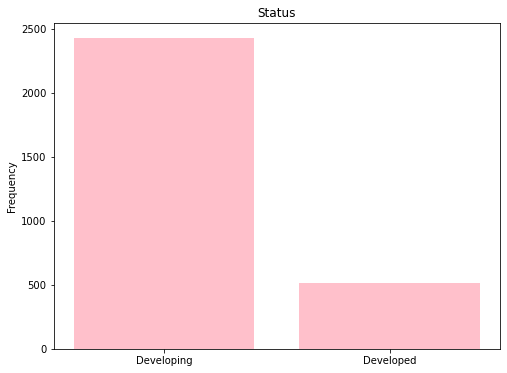

In [13]:
plt.figure(figsize=(8,6))

plt.bar(x = ["Developing","Developed"], height = life_df["Status"].value_counts(), color="pink")
plt.ylabel("Frequency")
plt.title("Status")

### Feature Engineering

In [14]:
life_df2=life_df.copy()

In [15]:
pd.get_dummies(life_df2["Status"])

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [16]:
life_df2= pd.concat([life_df2, pd.get_dummies(life_df["Status"], drop_first=True)], axis=1)
life_df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


## Missing Value

In [17]:
life_df2.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developing                           0
dtype: int64

In [18]:
life_df2.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developing'],
      dtype=object)

Kelimelerin sonunda boşluk var

In [19]:
life_df2.columns = life_df2.columns.str.strip()


In [20]:
life_df2.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developing'],
      dtype=object)

Kelimelerin sonundaki boşluklar giderildi

### 1. Life Expectancy

In [21]:
life_df2["Life expectancy"].value_counts() 

73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
49.5     1
44.0     1
83.2     1
55.2     1
83.7     1
Name: Life expectancy, Length: 362, dtype: int64

In [142]:
life_df2[life_df2["Life expectancy"].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,1
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,1
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,1
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,1
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN,1
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,1
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4,1
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1,1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,1


In [23]:
new_data_agg=life_df2.groupby("Country").aggregate({"Life expectancy":["mean"]})

print(new_data_agg)

                                   Life expectancy
                                              mean
Country                                           
Afghanistan                               58.19375
Albania                                   75.15625
Algeria                                   73.61875
Angola                                    49.01875
Antigua and Barbuda                       75.05625
...                                            ...
Venezuela (Bolivarian Republic of)        73.38750
Viet Nam                                  74.77500
Yemen                                     63.86250
Zambia                                    53.90625
Zimbabwe                                  50.48750

[193 rows x 1 columns]


In [24]:
life_df3=life_df2.copy()

In [143]:
life_df3["Life expectancy"]=life_df3["Life expectancy"].fillna(life_df3.groupby("Country")["Life expectancy"].transform("mean"))
life_df3["Life expectancy"]=life_df3["Life expectancy"].fillna(life_df3["Life expectancy"].mean())

In [26]:
life_df3["Life expectancy"].isnull().sum()

0

According to the Country averages, the empty parts in Life expectancy were filled.

### 2. Adult Mortality

In [27]:
new_data_agg2=life_df3.groupby("Country").aggregate({"Adult Mortality":["mean"]})

print(new_data_agg2)

                                   Adult Mortality
                                              mean
Country                                           
Afghanistan                               269.0625
Albania                                    45.0625
Algeria                                   108.1875
Angola                                    328.5625
Antigua and Barbuda                       127.5000
...                                            ...
Venezuela (Bolivarian Republic of)        163.0000
Viet Nam                                  126.5625
Yemen                                     211.8125
Zambia                                    354.3125
Zimbabwe                                  462.3750

[193 rows x 1 columns]


In [28]:
life_df3["Adult Mortality"]=life_df3["Adult Mortality"].fillna(life_df3.groupby("Country")["Adult Mortality"].transform("mean"))
life_df3["Adult Mortality"]=life_df3["Adult Mortality"].fillna(life_df3["Adult Mortality"].mean())

In [29]:
life_df3["Adult Mortality"].isnull().sum()

0

According to the Country averages, the empty parts in Adult Mortality were filled.


### 3. Alcohol

In [30]:
new_data_agg3=life_df3.groupby("Country").aggregate({"Alcohol":["mean"]})

print(new_data_agg3)

                                     Alcohol
                                        mean
Country                                     
Afghanistan                         0.014375
Albania                             4.848750
Algeria                             0.406667
Angola                              5.740667
Antigua and Barbuda                 7.949333
...                                      ...
Venezuela (Bolivarian Republic of)  7.420000
Viet Nam                            3.087333
Yemen                               0.047333
Zambia                              2.239333
Zimbabwe                            4.482000

[193 rows x 1 columns]


In [31]:
life_df3["Alcohol"]=life_df3["Alcohol"].fillna(life_df3.groupby("Country")["Alcohol"].transform("mean"))
life_df3["Alcohol"]=life_df3["Alcohol"].fillna(life_df3["Alcohol"].mean())

In [32]:
life_df3["Alcohol"].isnull().sum()

0

According to the Country averages, the empty parts in  Alcohol were filled.


### 4. Hepatitis B

In [33]:
new_data_agg4=life_df3.groupby("Country").aggregate({"Hepatitis B":["mean"]})

print(new_data_agg4)

                                   Hepatitis B
                                          mean
Country                                       
Afghanistan                          64.562500
Albania                              98.000000
Algeria                              78.000000
Angola                               70.222222
Antigua and Barbuda                  98.266667
...                                        ...
Venezuela (Bolivarian Republic of)   66.250000
Viet Nam                             87.538462
Yemen                                55.687500
Zambia                               69.818182
Zimbabwe                             70.562500

[193 rows x 1 columns]


In [34]:
life_df3["Hepatitis B"]=life_df3["Hepatitis B"].fillna(life_df3.groupby("Country")["Hepatitis B"].transform("mean"))
life_df3["Hepatitis B"]=life_df3["Hepatitis B"].fillna(life_df3["Hepatitis B"].mean())

In [35]:
life_df3["Hepatitis B"].isnull().sum()

0

According to the Country averages, the empty parts in Hepatitis B were filled.


### 5. BMI

In [36]:
new_data_agg5=life_df3.groupby("Country").aggregate({"BMI":["mean"]})

print(new_data_agg5)

                                         BMI
                                        mean
Country                                     
Afghanistan                         15.51875
Albania                             49.06875
Algeria                             48.74375
Angola                              18.01875
Antigua and Barbuda                 38.42500
...                                      ...
Venezuela (Bolivarian Republic of)  54.48750
Viet Nam                            11.18750
Yemen                               33.48750
Zambia                              17.45000
Zimbabwe                            25.13750

[193 rows x 1 columns]


In [37]:
life_df3["BMI"]=life_df3["BMI"].fillna(life_df3.groupby("Country")["BMI"].transform("mean"))
life_df3["BMI"]=life_df3["BMI"].fillna(life_df3["BMI"].mean())

In [38]:
life_df3["BMI"].isnull().sum()

0

According to the Country averages, the empty parts in BMI were filled.


### 6. Polio 

In [39]:
new_data_agg6=life_df3.groupby("Country").aggregate({"Polio":["mean"]})

print(new_data_agg6)

                                      Polio
                                       mean
Country                                    
Afghanistan                         48.3750
Albania                             98.1250
Algeria                             91.7500
Angola                              46.1250
Antigua and Barbuda                 96.9375
...                                     ...
Venezuela (Bolivarian Republic of)  74.6875
Viet Nam                            94.9375
Yemen                               67.1250
Zambia                              64.3750
Zimbabwe                            75.6250

[193 rows x 1 columns]


In [40]:
life_df3["Polio"]=life_df3["Polio"].fillna(life_df3.groupby("Country")["Polio"].transform("mean"))
life_df3["Polio"]=life_df3["Polio"].fillna(life_df3["Polio"].mean())

In [41]:
life_df3["Polio"].isnull().sum()

0

According to the Country averages, the empty parts in Polio were filled.


### 7. Total expenditure

In [42]:
new_data_agg7=life_df3.groupby("Country").aggregate({"Total expenditure":["mean"]})

print(new_data_agg7)

                                   Total expenditure
                                                mean
Country                                             
Afghanistan                                 8.252500
Albania                                     5.945625
Algeria                                     4.604000
Angola                                      3.919333
Antigua and Barbuda                         4.791333
...                                              ...
Venezuela (Bolivarian Republic of)          4.998667
Viet Nam                                    5.977333
Yemen                                       5.005333
Zambia                                      5.824000
Zimbabwe                                    6.158667

[193 rows x 1 columns]


In [43]:
life_df3["Total expenditure"]=life_df3["Total expenditure"].fillna(life_df3.groupby("Country")["Total expenditure"].transform("mean"))
life_df3["Total expenditure"]=life_df3["Total expenditure"].fillna(life_df3["Total expenditure"].mean())

In [44]:
life_df3["Total expenditure"].isnull().sum()

0

According to the Country averages, the empty parts in Total expenditure were filled.


### 8. Diphtheria

In [45]:
new_data_agg8=life_df3.groupby("Country").aggregate({"Diphtheria":["mean"]})

print(new_data_agg8)

                                   Diphtheria
                                         mean
Country                                      
Afghanistan                           52.3125
Albania                               98.0625
Algeria                               91.8750
Angola                                47.6875
Antigua and Barbuda                   98.3125
...                                       ...
Venezuela (Bolivarian Republic of)    68.5000
Viet Nam                              91.7500
Yemen                                 72.6250
Zambia                                74.2500
Zimbabwe                              75.1875

[193 rows x 1 columns]


In [46]:
life_df3["Diphtheria"]=life_df3["Diphtheria"].fillna(life_df3.groupby("Country")["Diphtheria"].transform("mean"))
life_df3["Diphtheria"]=life_df3["Diphtheria"].fillna(life_df3["Diphtheria"].mean())

In [47]:
life_df3["Diphtheria"].isnull().sum()

0

According to the Country averages, the empty parts in Diphtheria were filled.


### 9. GDP (Gross Domestic Product)

In [48]:
new_data_agg9=life_df3.groupby("Country").aggregate({"GDP":["mean"]})

print(new_data_agg9)

                                            GDP
                                           mean
Country                                        
Afghanistan                          340.015425
Albania                             2119.726679
Algeria                             2847.853392
Angola                              1975.143045
Antigua and Barbuda                 9759.305728
...                                         ...
Venezuela (Bolivarian Republic of)          NaN
Viet Nam                                    NaN
Yemen                                       NaN
Zambia                               811.811841
Zimbabwe                             410.980194

[193 rows x 1 columns]


In [49]:
life_df3["GDP"]=life_df3["GDP"].fillna(life_df3.groupby("Country")["GDP"].transform("mean"))
life_df3["GDP"]=life_df3["GDP"].fillna(life_df3["GDP"].mean())

In [50]:
life_df3["GDP"].isnull().sum()

0

According to the Country averages, the empty parts in GDP were filled.

### 10. Population 

In [51]:
new_data_agg10=life_df3.groupby("Country").aggregate({"Population":["mean"]})

print(new_data_agg10)

                                      Population
                                            mean
Country                                         
Afghanistan                         9.972260e+06
Albania                             6.969116e+05
Algeria                             2.164983e+07
Angola                              1.014710e+07
Antigua and Barbuda                          NaN
...                                          ...
Venezuela (Bolivarian Republic of)           NaN
Viet Nam                                     NaN
Yemen                                        NaN
Zambia                              6.260246e+06
Zimbabwe                            8.021343e+06

[193 rows x 1 columns]


In [52]:
life_df3["Population"]=life_df3["Population"].fillna(life_df3.groupby("Country")["Population"].transform("mean"))
life_df3["Population"]=life_df3["Population"].fillna(life_df3["Population"].mean())

In [53]:
life_df3["Population"].isnull().sum()

0

According to the Country averages, the empty parts in Population were filled.

### 11. Thinness  1-19 years

In [54]:
new_data_agg11=life_df3.groupby("Country").aggregate({"thinness  1-19 years":["mean"]})

print(new_data_agg11)

                                   thinness  1-19 years
                                                   mean
Country                                                
Afghanistan                                    16.58125
Albania                                         1.61875
Algeria                                         6.09375
Angola                                          6.19375
Antigua and Barbuda                             3.42500
...                                                 ...
Venezuela (Bolivarian Republic of)              1.65000
Viet Nam                                       14.92500
Yemen                                          13.83125
Zambia                                          6.88125
Zimbabwe                                        7.01250

[193 rows x 1 columns]


In [55]:
life_df3["thinness  1-19 years"]=life_df3["thinness  1-19 years"].fillna(life_df3.groupby("Country")["thinness  1-19 years"].transform("mean"))
life_df3["thinness  1-19 years"]=life_df3["thinness  1-19 years"].fillna(life_df3["thinness  1-19 years"].mean())

In [56]:
life_df3["thinness  1-19 years"].isnull().sum()

0

According to the Country averages, the empty parts in thinness  1-19 years were filled.

### 12. Thinness 5-9 years 

In [57]:
new_data_agg12=life_df3.groupby("Country").aggregate({"thinness 5-9 years":["mean"]})

print(new_data_agg12)

                                   thinness 5-9 years
                                                 mean
Country                                              
Afghanistan                                  15.58125
Albania                                       1.70000
Algeria                                       5.97500
Angola                                        6.66875
Antigua and Barbuda                           3.37500
...                                               ...
Venezuela (Bolivarian Republic of)            1.56250
Viet Nam                                     15.62500
Yemen                                        13.75000
Zambia                                        6.76250
Zimbabwe                                      6.98750

[193 rows x 1 columns]


In [58]:
life_df3["thinness 5-9 years"]=life_df3["thinness 5-9 years"].fillna(life_df3.groupby("Country")["thinness 5-9 years"].transform("mean"))
life_df3["thinness 5-9 years"]=life_df3["thinness 5-9 years"].fillna(life_df3["thinness 5-9 years"].mean())

In [59]:
life_df3["thinness 5-9 years"].isnull().sum()

0

According to the Country averages, the empty parts in thinness 5-9 years were filled.

### 13. Income composition of resources

In [60]:
new_data_agg13=life_df3.groupby("Country").aggregate({"Income composition of resources":["mean"]})

print(new_data_agg13)

                                   Income composition of resources
                                                              mean
Country                                                           
Afghanistan                                               0.415375
Albania                                                   0.709875
Algeria                                                   0.694875
Angola                                                    0.458375
Antigua and Barbuda                                       0.488625
...                                                            ...
Venezuela (Bolivarian Republic of)                        0.726812
Viet Nam                                                  0.627063
Yemen                                                     0.475500
Zambia                                                    0.498437
Zimbabwe                                                  0.439125

[193 rows x 1 columns]


In [61]:
life_df3["Income composition of resources"]=life_df3["Income composition of resources"].fillna(life_df3.groupby("Country")["Income composition of resources"].transform("mean"))
life_df3["Income composition of resources"]=life_df3["Income composition of resources"].fillna(life_df3["Income composition of resources"].mean())

In [62]:
life_df3["Income composition of resources"].isnull().sum()

0

According to the Country averages, the empty parts in Income composition of resources were filled.

### 14. Schooling 

In [63]:
new_data_agg14=life_df3.groupby("Country").aggregate({"Schooling":["mean"]})

print(new_data_agg14)

                                   Schooling
                                        mean
Country                                     
Afghanistan                          8.21250
Albania                             12.13750
Algeria                             12.71250
Angola                               8.04375
Antigua and Barbuda                  8.84375
...                                      ...
Venezuela (Bolivarian Republic of)  12.78750
Viet Nam                            11.51250
Yemen                                8.50625
Zambia                              11.21250
Zimbabwe                             9.82500

[193 rows x 1 columns]


In [64]:
life_df3["Schooling"]=life_df3["Schooling"].fillna(life_df3.groupby("Country")["Schooling"].transform("mean"))
life_df3["Schooling"]=life_df3["Schooling"].fillna(life_df3["Schooling"].mean())

In [65]:
life_df3["Schooling"].isnull().sum()

0

According to the Country averages, the empty parts in Schooling were filled.

In [66]:
life_df3.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Developing                         0
dtype: int64

## Outliers

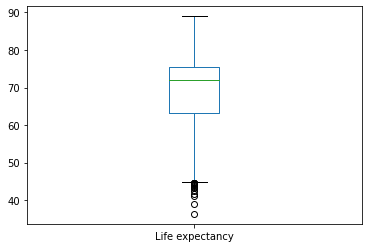

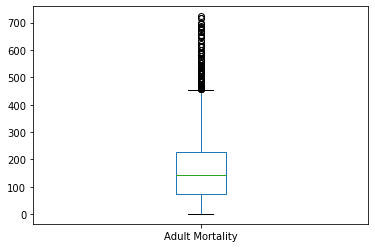

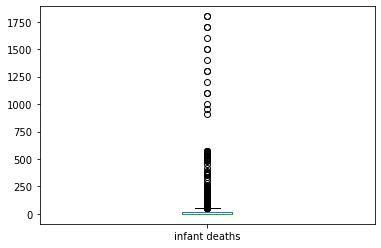

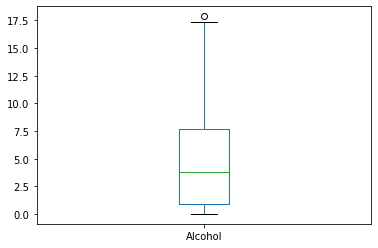

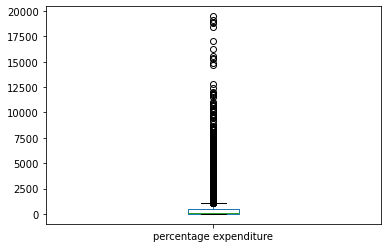

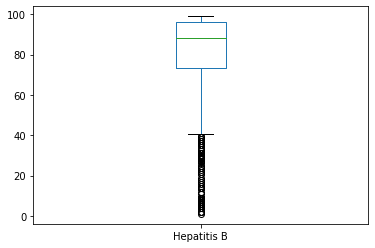

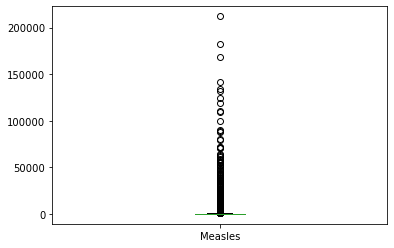

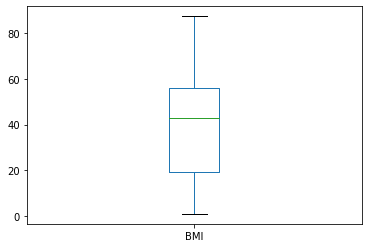

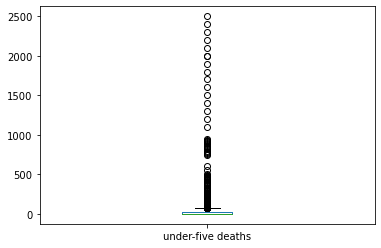

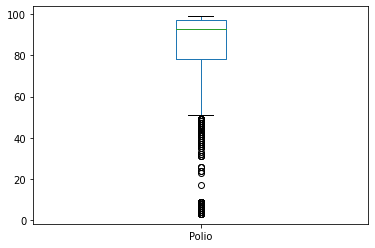

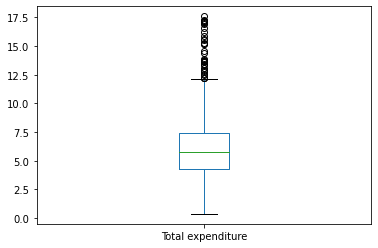

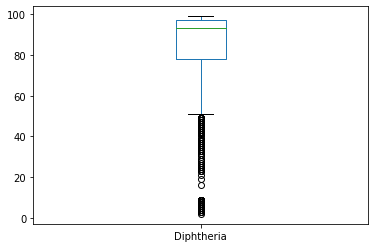

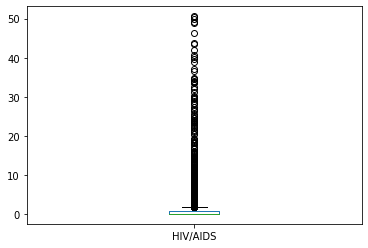

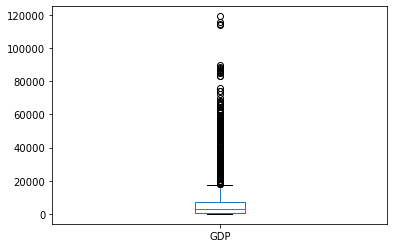

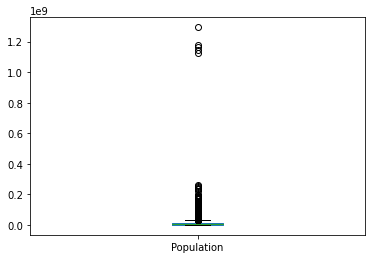

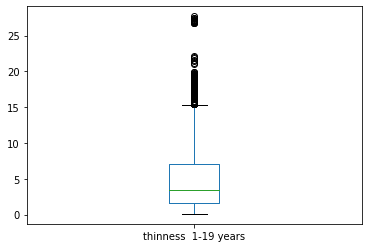

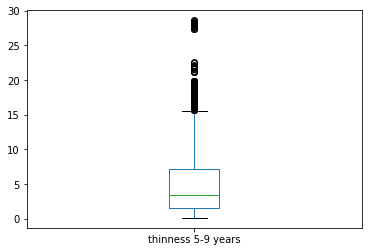

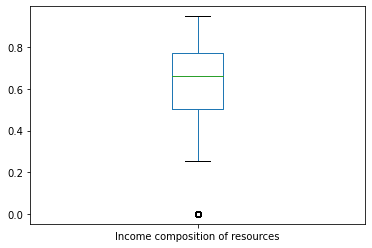

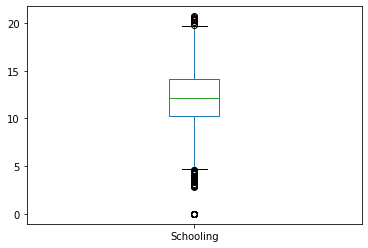

In [67]:
col_name= ['Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']


for i in col_name:
    life_df3[i].plot.box()
    plt.show()

### Second Method

In [68]:
col_dict = {'Life expectancy':1 , 'Adult Mortality':2 , 'infant deaths':3,
        'Alcohol':4 , 'percentage expenditure': 5, 'Hepatitis B': 6,
       'Measles' : 7, 'BMI': 8, 'under-five deaths' : 9, 'Polio' : 10, 'Total expenditure' :11,
       'Diphtheria':12, 'HIV/AIDS':13, 'GDP':14, 'Population' :15,
       'thinness  1-19 years' :16, 'thinness 5-9 years' :17,
       'Income composition of resources' : 18, 'Schooling' :19}

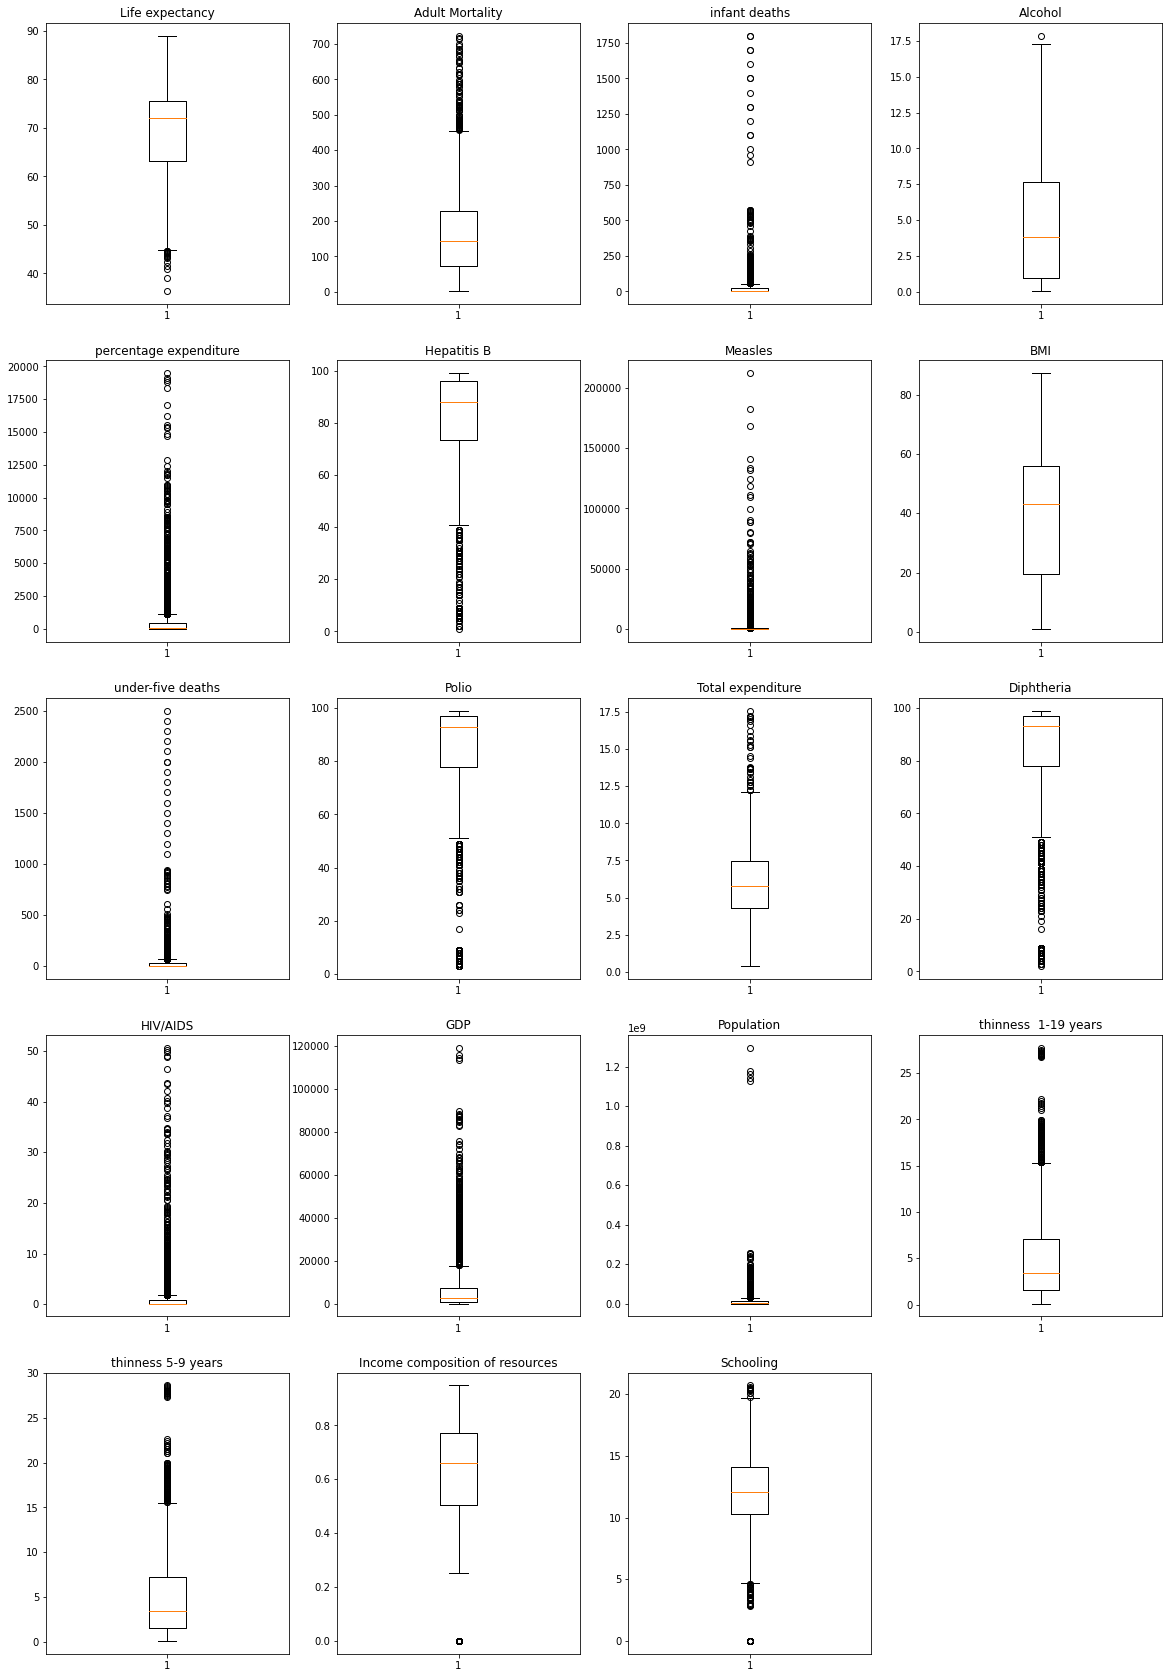

In [69]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_df3[variable],whis=1.5)
                     plt.title(variable)

plt.show()

BMI' de herhangi bir outlier görünmemektedir.

### 1. Winsorize

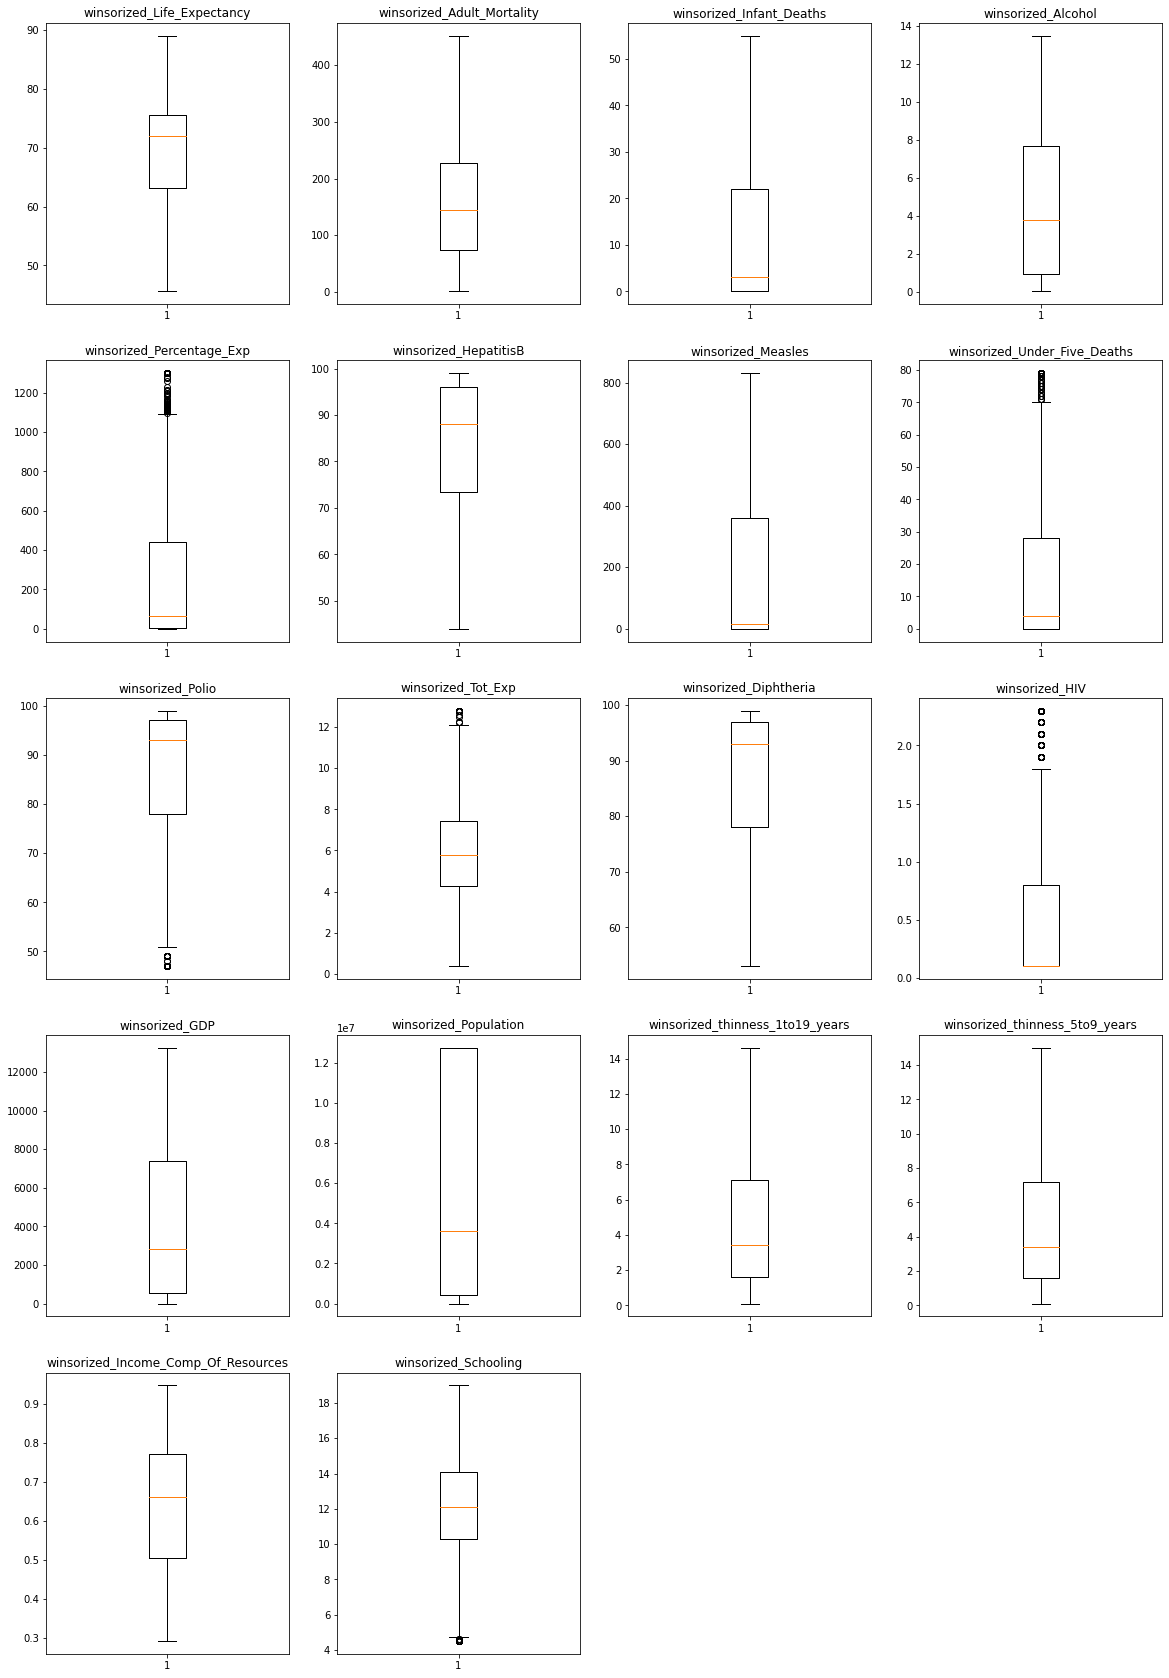

In [70]:
plt.figure(figsize=(20,30))

plt.subplot(5,4,1)
winsorized_Life_Expectancy = winsorize(life_df3['Life expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.subplot(5,4,2)
winsorized_Adult_Mortality = winsorize(life_df3['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.subplot(5,4,3)
winsorized_Infant_Deaths = winsorize(life_df3['infant deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.subplot(5,4,4)
winsorized_Alcohol = winsorize(life_df3['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.subplot(5,4,5)
winsorized_Percentage_Exp = winsorize(life_df3['percentage expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.subplot(5,4,6)
winsorized_HepatitisB = winsorize(life_df3['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.subplot(5,4,7)
winsorized_Measles = winsorize(life_df3['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.subplot(5,4,8)
winsorized_Under_Five_Deaths = winsorize(life_df3['under-five deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.subplot(5,4,9)
winsorized_Polio = winsorize(life_df3['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.subplot(5,4,10)
winsorized_Tot_Exp = winsorize(life_df3['Total expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.subplot(5,4,11)
winsorized_Diphtheria = winsorize(life_df3['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.subplot(5,4,12)
winsorized_HIV = winsorize(life_df3['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.subplot(5,4,13)
winsorized_GDP = winsorize(life_df3['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.subplot(5,4,14)
winsorized_Population = winsorize(life_df3['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.subplot(5,4,15)
winsorized_thinness_1to19_years = winsorize(life_df3['thinness  1-19 years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.subplot(5,4,16)
winsorized_thinness_5to9_years = winsorize(life_df3['thinness 5-9 years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.subplot(5,4,17)
winsorized_Income_Comp_Of_Resources = winsorize(life_df3['Income composition of resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.subplot(5,4,18)
winsorized_Schooling = winsorize(life_df3['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [71]:
life_df4=life_df3.copy()

In [72]:
life_df4['Life expectancy'] = winsorized_Life_Expectancy
life_df4['Adult Mortality'] = winsorized_Adult_Mortality
life_df4['infant deaths'] = winsorized_Infant_Deaths
life_df4['Alcohol'] = winsorized_Alcohol
life_df4['percentage expenditure'] = winsorized_Percentage_Exp
life_df4['Hepatitis B'] = winsorized_HepatitisB
life_df4['under-five deaths'] = winsorized_Under_Five_Deaths
life_df4['Polio'] = winsorized_Polio
life_df4['Total expenditure'] = winsorized_Tot_Exp
life_df4['Diphtheria'] = winsorized_Diphtheria
life_df4['HIV/AIDS'] = winsorized_HIV
life_df4['GDP'] = winsorized_GDP
life_df4['Population'] = winsorized_Population
life_df4['thinness  1-19 years'] = winsorized_thinness_1to19_years
life_df4['thinness 5-9 years'] = winsorized_thinness_5to9_years
life_df4['Income composition of resources'] = winsorized_Income_Comp_Of_Resources
life_df4['Schooling'] = winsorized_Schooling
life_df4['Measles'] = winsorized_Measles

### Visualization For Winsorize

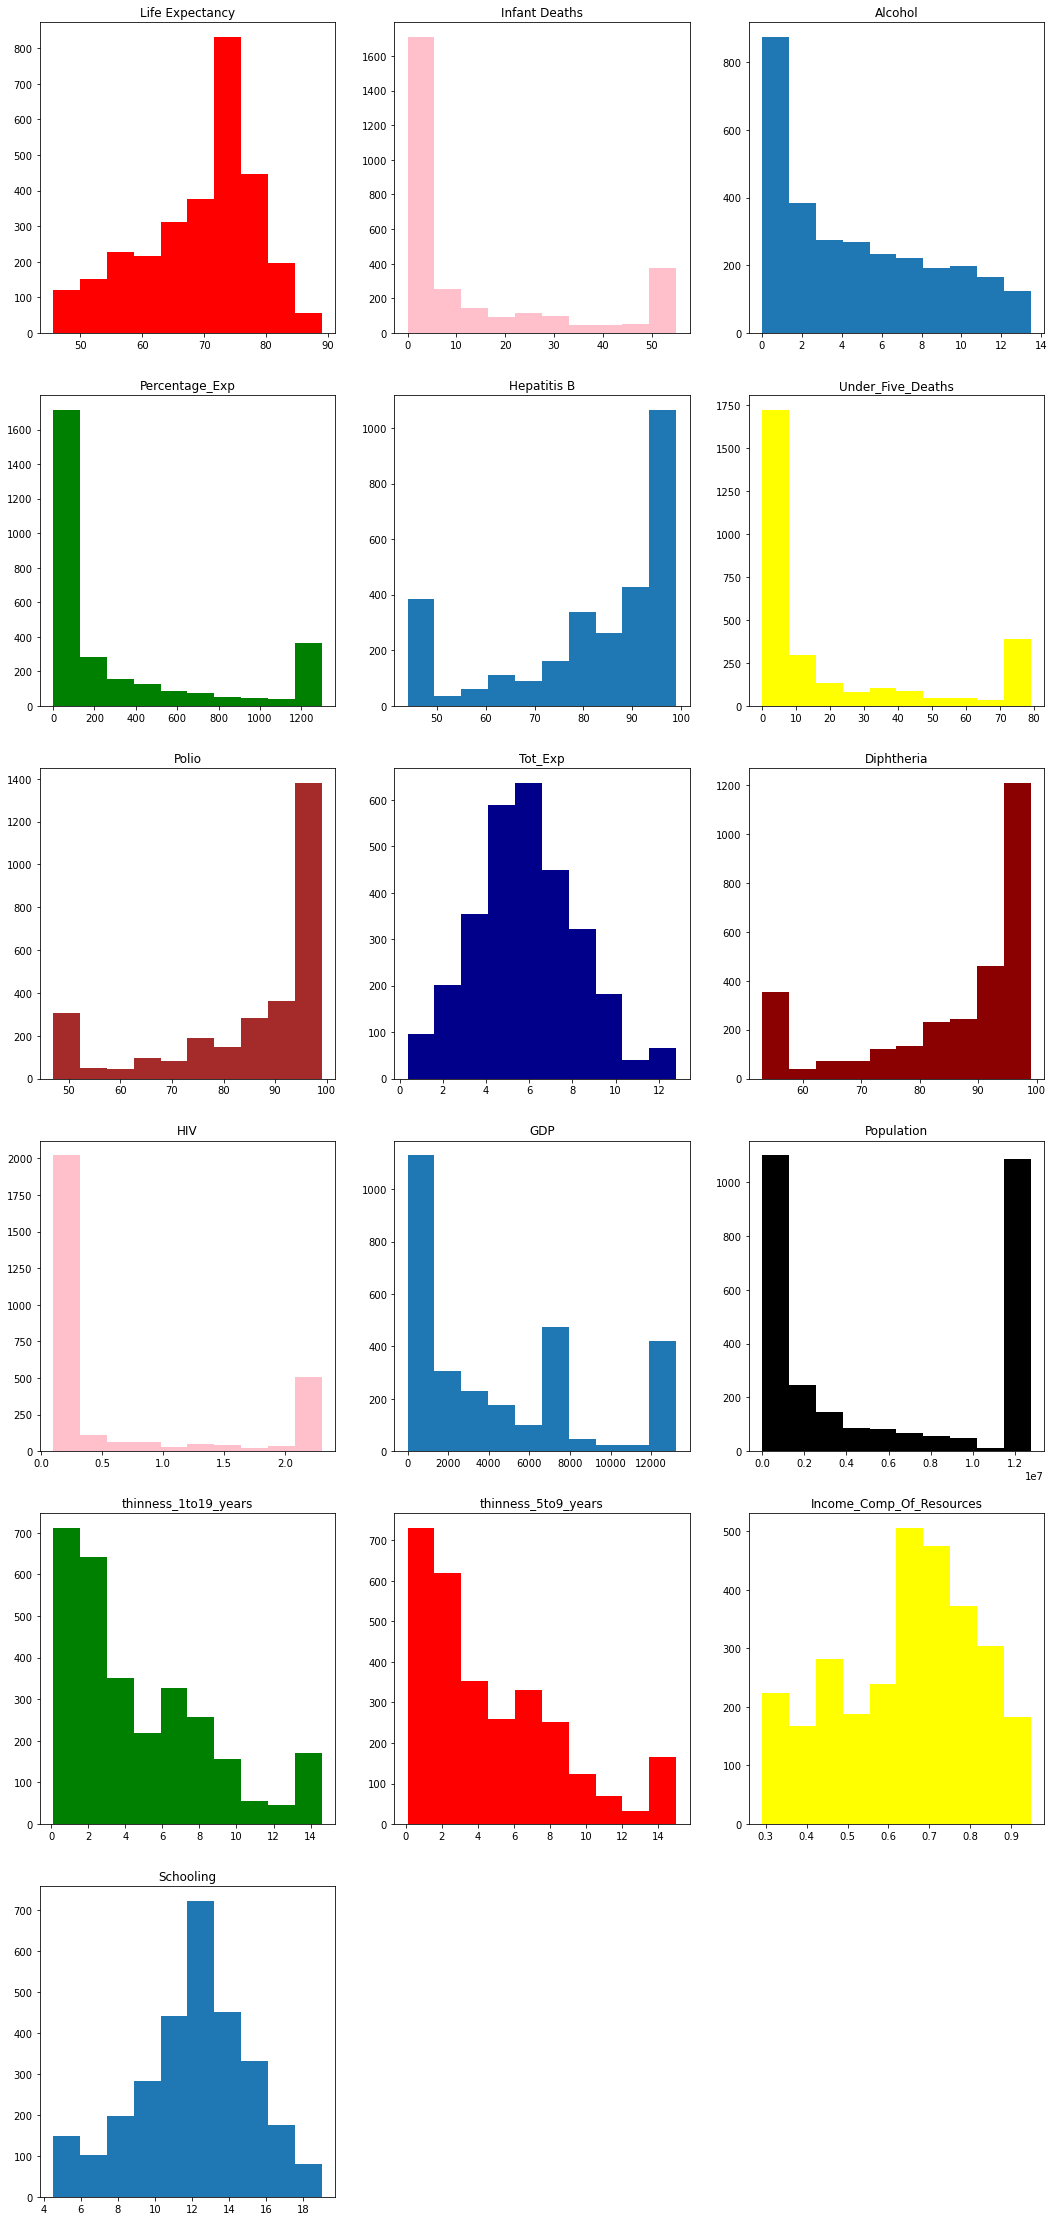

In [73]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.hist(life_df4["Life expectancy"] ,color="red")
plt.title("Life Expectancy")

plt.subplot(6,3,2)
plt.hist(life_df4["infant deaths"], color="pink")
plt.title("Infant Deaths")

plt.subplot(6,3,3)
plt.hist(life_df4["Alcohol"])
plt.title("Alcohol")

plt.subplot(6,3,4)
plt.hist(life_df4["percentage expenditure"], color="green")
plt.title("Percentage_Exp")

plt.subplot(6,3,5)
plt.hist(life_df4["Hepatitis B"])
plt.title("Hepatitis B")

plt.subplot(6,3,6)
plt.hist(life_df4["under-five deaths"], color="yellow")
plt.title("Under_Five_Deaths")

plt.subplot(6,3,7)
plt.hist(life_df4["Polio"], color="brown")
plt.title("Polio")

plt.subplot(6,3,8)
plt.hist(life_df4["Total expenditure"], color="darkblue")
plt.title("Tot_Exp")

plt.subplot(6,3,9)
plt.hist(life_df4["Diphtheria"], color="darkred")
plt.title("Diphtheria")

plt.subplot(6,3,10)
plt.hist(life_df4["HIV/AIDS"], color="pink")
plt.title("HIV")

plt.subplot(6,3,11)
plt.hist(life_df4["GDP"])
plt.title("GDP")

plt.subplot(6,3,12)
plt.hist(life_df4["Population"] , color="black")
plt.title("Population")

plt.subplot(6,3,13)
plt.hist(life_df4["thinness  1-19 years"], color="green")
plt.title("thinness_1to19_years")

plt.subplot(6,3,14)
plt.hist(life_df4["thinness 5-9 years"], color="red")
plt.title("thinness_5to9_years")

plt.subplot(6,3,15)
plt.hist(life_df4["Income composition of resources"], color="yellow")
plt.title("Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.hist(life_df4["Schooling"])
plt.title("Schooling")


plt.show()

They have wide range and positive,negative skews.

### 2. LOG Transfom

In [74]:
life_df5=life_df3.copy()

In [75]:
life_df5["Log_Life expectancy"] = life_df5["Life expectancy"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Life expectancy")
print(life_df5['Life expectancy'].skew())
print(life_df5['Log_Life expectancy'].skew())
print("**"*30)

life_df5["Log_Adult Mortality"] = life_df5["Adult Mortality"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Adult Mortality")
print(life_df5['Adult Mortality'].skew())
print(life_df5['Log_Adult Mortality'].skew())
print("**"*30)

life_df5["Log_infant deaths"] = life_df5["infant deaths"].map(lambda i: np.log(i) if i > 0 else 0) 
print("infant deaths")
print(life_df5['infant deaths'].skew())
print(life_df5['Log_infant deaths'].skew())
print("**"*30)

life_df5["Log_Alcohol"] = life_df5["Alcohol"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Alcohol")
print(life_df5['Alcohol'].skew())
print(life_df5['Log_Alcohol'].skew())
print("**"*30)

life_df5["Log_percentage expenditure"] = life_df5["percentage expenditure"].map(lambda i: np.log(i) if i > 0 else 0) 
print("percentage expenditure")
print(life_df5['percentage expenditure'].skew())
print(life_df5['Log_percentage expenditure'].skew())
print("**"*30)

life_df5["Log_Hepatitis B"] = life_df5["Hepatitis B"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Hepatitis B")
print(life_df5['Hepatitis B'].skew())
print(life_df5['Log_Hepatitis B'].skew())
print("**"*30)

life_df5["Log_Measles"] = life_df5["Measles"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Measles")
print(life_df5['Measles'].skew())
print(life_df5['Log_Measles'].skew())
print("**"*30)


life_df5["Log_under-five deaths"] = life_df5["under-five deaths"].map(lambda i: np.log(i) if i > 0 else 0) 
print("under-five deaths")
print(life_df5['under-five deaths'].skew())
print(life_df5['Log_under-five deaths'].skew())
print("**"*30)

life_df5["Log_Polio"] = life_df5["Polio"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Polio")
print(life_df5['Polio'].skew())
print(life_df5['Log_Polio'].skew())
print("**"*30)

life_df5["Log_Total expenditure"] = life_df5["Total expenditure"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Total expenditure")
print(life_df5['Total expenditure'].skew())
print(life_df5['Log_Total expenditure'].skew())
print("**"*30)

life_df5["Log_Diphtheria"] = life_df5["Diphtheria"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Diphtheria")
print(life_df5['Diphtheria'].skew())
print(life_df5['Log_Diphtheria'].skew())
print("**"*30)

life_df5["Log_HIV/AIDS"] = life_df5["HIV/AIDS"].map(lambda i: np.log(i) if i > 0 else 0) 
print("HIV/AIDS")
print(life_df5['HIV/AIDS'].skew())
print(life_df5['Log_HIV/AIDS'].skew())
print("**"*30)

life_df5["Log_GDP"] = life_df5["GDP"].map(lambda i: np.log(i) if i > 0 else 0) 
print("GDP")
print(life_df5['GDP'].skew())
print(life_df5['Log_GDP'].skew())
print("**"*30)

life_df5["Log_Population"] = life_df5["Population"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Population")
print(life_df5['Population'].skew())
print(life_df5['Log_Population'].skew())
print("**"*30)

life_df5["Log_thinness  1-19 years"] = life_df5["thinness  1-19 years"].map(lambda i: np.log(i) if i > 0 else 0) 
print("thinness  1-19 years")
print(life_df5['thinness  1-19 years'].skew())
print(life_df5['Log_thinness  1-19 years'].skew())
print("**"*30)

life_df5["Log_thinness 5-9 years"] = life_df5["thinness 5-9 years"].map(lambda i: np.log(i) if i > 0 else 0) 
print("thinness 5-9 years")
print(life_df5['thinness 5-9 years'].skew())
print(life_df5['Log_thinness 5-9 years'].skew())
print("**"*30)

life_df5["Log_Income composition of resources"] = life_df5["Income composition of resources"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Income composition of resources")
print(life_df5['Income composition of resources'].skew())
print(life_df5['Log_Income composition of resources'].skew())
print("**"*30)

life_df5["Log_Schooling"] = life_df5["Schooling"].map(lambda i: np.log(i) if i > 0 else 0) 
print("Schooling")
print(life_df5['Schooling'].skew())
print(life_df5['Log_Schooling'].skew())
print("**"*30)

Life expectancy
-0.6396932035944191
-0.9500593448354054
************************************************************
Adult Mortality
1.1763711378603756
-1.2689410965252448
************************************************************
infant deaths
9.786962950426057
0.7650746543861621
************************************************************
Alcohol
0.5918114367288055
-1.3879918927571828
************************************************************
percentage expenditure
4.652051347835061
-0.07936047589625414
************************************************************
Hepatitis B
-1.6873913868591932
-2.9290042427733853
************************************************************
Measles
9.441331947061583
0.5596420627296095
************************************************************
under-five deaths
9.495064656961773
0.6884095638408807
************************************************************
Polio
-2.068997867215247
-3.26256574772692
**********************************************

### Visualization For Log Transform

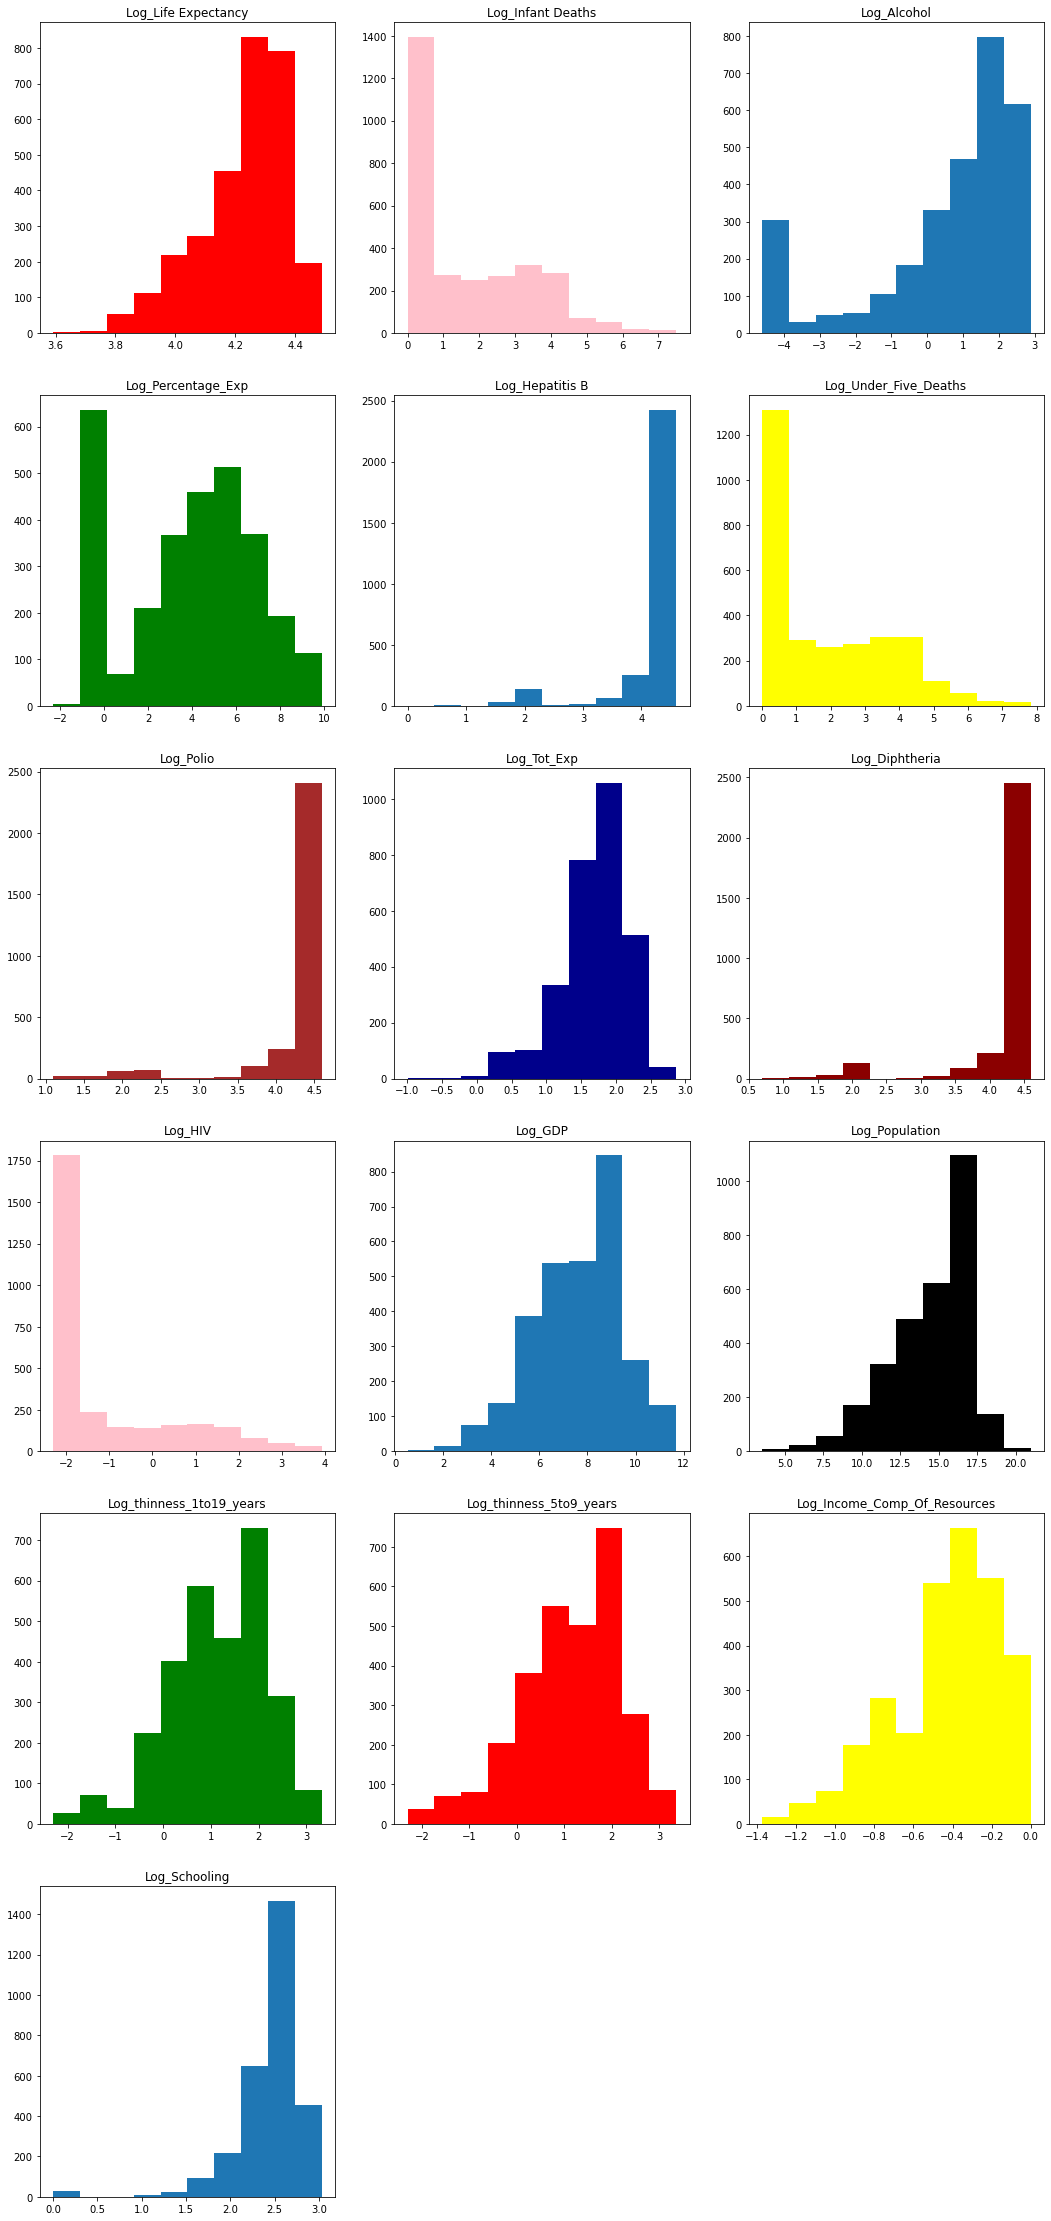

In [76]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.hist(life_df5["Log_Life expectancy"] ,color="red")
plt.title("Log_Life Expectancy")

plt.subplot(6,3,2)
plt.hist(life_df5["Log_infant deaths"], color="pink")
plt.title("Log_Infant Deaths")

plt.subplot(6,3,3)
plt.hist(life_df5["Log_Alcohol"])
plt.title("Log_Alcohol")

plt.subplot(6,3,4)
plt.hist(life_df5["Log_percentage expenditure"], color="green")
plt.title("Log_Percentage_Exp")

plt.subplot(6,3,5)
plt.hist(life_df5["Log_Hepatitis B"])
plt.title("Log_Hepatitis B")

plt.subplot(6,3,6)
plt.hist(life_df5["Log_under-five deaths"], color="yellow")
plt.title("Log_Under_Five_Deaths")

plt.subplot(6,3,7)
plt.hist(life_df5["Log_Polio"], color="brown")
plt.title("Log_Polio")

plt.subplot(6,3,8)
plt.hist(life_df5["Log_Total expenditure"], color="darkblue")
plt.title("Log_Tot_Exp")

plt.subplot(6,3,9)
plt.hist(life_df5["Log_Diphtheria"], color="darkred")
plt.title("Log_Diphtheria")

plt.subplot(6,3,10)
plt.hist(life_df5["Log_HIV/AIDS"], color="pink")
plt.title("Log_HIV")

plt.subplot(6,3,11)
plt.hist(life_df5["Log_GDP"])
plt.title("Log_GDP")

plt.subplot(6,3,12)
plt.hist(life_df5["Log_Population"] , color="black")
plt.title("Log_Population")

plt.subplot(6,3,13)
plt.hist(life_df5["Log_thinness  1-19 years"], color="green")
plt.title("Log_thinness_1to19_years")

plt.subplot(6,3,14)
plt.hist(life_df5["Log_thinness 5-9 years"], color="red")
plt.title("Log_thinness_5to9_years")

plt.subplot(6,3,15)
plt.hist(life_df5["Log_Income composition of resources"], color="yellow")
plt.title("Log_Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.hist(life_df5["Log_Schooling"])
plt.title("Log_Schooling")


plt.show()

### Visulation for Categoric Variable

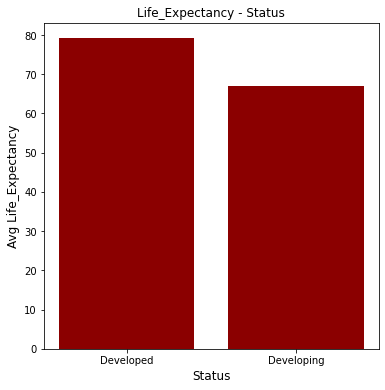

In [77]:
plt.figure(figsize=(6,6))
plt.bar(life_df5.groupby('Status')['Status'].count().index,life_df5.groupby('Status')['Life expectancy'].mean() , color="darkred")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

### T-test for Status

In [78]:
stats.ttest_ind(life_df3.loc[life_df3['Status']=='Developed','Life expectancy'],life_df3.loc[life_df3['Status']=='Developing','Life expectancy'])

Ttest_indResult(statistic=29.805188781530223, pvalue=9.034938663789684e-171)

## Regression

In [79]:
life_df5.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Log_Polio,Log_Total expenditure,Log_Diphtheria,Log_HIV/AIDS,Log_GDP,Log_Population,Log_thinness 1-19 years,Log_thinness 5-9 years,Log_Income composition of resources,Log_Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,1.791759,2.099244,4.174387,-2.302585,6.370345,17.334091,2.844909,2.850707,-0.736055,2.312535
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,4.060443,2.101692,4.127134,-2.302585,6.417870,12.699494,2.862201,2.862201,-0.742337,2.302585
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,4.127134,2.095561,4.158883,-2.302585,6.448486,17.272826,2.873565,2.873565,-0.755023,2.292535
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,4.204693,2.142416,4.204693,-2.302585,6.507217,15.123021,2.884801,2.890372,-0.770028,2.282382
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,4.219508,2.063058,4.219508,-2.302585,4.151626,14.906964,2.901422,2.901422,-0.789658,2.251292


### Correlation

In [80]:
correlation = life_df5.corr()
print(correlation)

                                         Year  Life expectancy  \
Year                                 1.000000         0.169623   
Life expectancy                      0.169623         1.000000   
Adult Mortality                     -0.078861        -0.696359   
infant deaths                       -0.037415        -0.196535   
Alcohol                             -0.047276         0.404155   
percentage expenditure               0.031400         0.381791   
Hepatitis B                          0.138707         0.299971   
Measles                             -0.082493        -0.157574   
BMI                                  0.108327         0.559255   
under-five deaths                   -0.042937        -0.222503   
Polio                                0.097369         0.470458   
Total expenditure                    0.081714         0.225739   
Diphtheria                           0.136900         0.483644   
HIV/AIDS                            -0.139741        -0.556457   
GDP       

<AxesSubplot:>

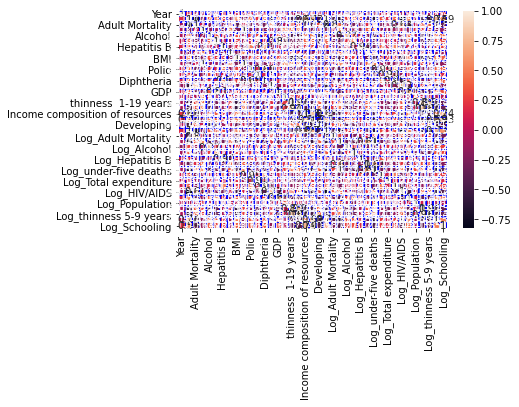

In [81]:
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

### Train and Test Dataset

In [82]:
X= life_df5[["Adult Mortality","BMI", "Schooling", "Log_under-five deaths", "Log_HIV/AIDS", "Log_Income composition of resources"]]
y = life_df5["Life expectancy"]

In [83]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1111)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 6)
(588, 6)
(2350,)
(588,)


### Linear Regression

**General Model**

In [84]:
model= linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [85]:
print('Variables: \n', model.coef_)
print('Fixed Value (bias): \n', model.intercept_)

Variables: 
 [-0.01605884  0.01692335  0.70558936 -0.61430745 -2.33422822  4.58815329]
Fixed Value (bias): 
 62.99397024226544


**Life expectancy= 62.99397024226544 - 0.01605884 * Adult Mortality + 0.01692335 * BMI + 0.70558936 * Schooling - 0.61430745 * Log_under-five deaths - 2.33422822 * Log_HIV/AIDS + 4.58815329 * Log_Income composition of resources** 

In [86]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2462.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        21:45:36   Log-Likelihood:                -8143.0
No. Observations:                2938   AIC:                         1.630e+04
Df Residuals:                    2931   BIC:                         1.634e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  62.9940      0.557    113.176      0.000      61.903      64.085
Adult Mortality                        -0.0161      0.001    -20.971      0.000      -0.018      -0.015
BMI                                     0.0169      0.005      3.741      0.000       0.008       0.026
Schooling                               0.7056      0.032     22.153      0.000       0.643       0.768
Log_under-five deaths                  -0.6143      0.051    -12.015      0.000      -0.715      -0.514
Log_HIV/AIDS                           -2.3342      0.066    -35.234      0.000      -2.464      -2.204
Log_Income composition of resources     4.5882      0.415     11.059      0.000       3.775       5.402
==============================================================================
Omnibus:                       79.335   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.158
Skew:                          -0.189   Prob(JB):                     1.50e-33
Kurtosis:                       4.045   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 and adj. R^2 are bigger than %70

p value of variables are nearly 0

This is a good model

**Train Model (OLS)**

In [87]:
model2= linear_model.LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [88]:
print('Variables: \n', model2.coef_)
print('Fixed Value (bias): \n', model2.intercept_)

Variables: 
 [-0.01525731  0.01863554  0.70895387 -0.62212522 -2.37172673  4.62494086]
Fixed Value (bias): 
 62.74092210105783


Variables of train and general models are very similar

**Prediction**

In [89]:
y_preds_train = model2.predict(X_train)
y_preds_test = model2.predict(X_test) 

In [90]:
print("R-squared of the model in training set is: {}".format(model2.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model2.score(X_test, y_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8382629602516342
-----Test set statistics-----
R-squared of the model in test set is: 0.8177741046280087
Mean absolute error (MAE) of the prediction is: 2.91326788592401
Mean squared error (MSE) of the prediction is: 15.624130714963071
Root mean squared error (RMSE) of the prediction is: 3.9527371168549865
Mean absolute percentage error (MAPE) of the prediction is: 4.40739352365616


R^2 of test and train models are very similar and bigger than %70


## Ridge Regression

**Train Model**

In [91]:
ridge_regr = Ridge(alpha=10**2) 
ridge_regr.fit(X_train, y_train)

Ridge(alpha=100)

In [92]:
print('Variables: \n', ridge_regr.coef_)
print('Fixed Value (bias): \n', ridge_regr.intercept_)

Variables: 
 [-0.01592401  0.02308724  0.80405979 -0.70067056 -2.41756184  1.96180043]
Fixed Value (bias): 
 60.46391455133659


**Prediction**

In [93]:
y_preds_train2 = ridge_regr.predict(X_train)
y_preds_test2 = ridge_regr.predict(X_test)

In [94]:
print("R-squared of the model in training set is: {}".format(ridge_regr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_regr.score(X_test, y_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test2)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_test, y_preds_test2)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_test, y_preds_test2)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test2) / y_test)) * 100))

R-squared of the model in training set is: 0.8359464983642789
-----Test set statistics-----
R-squared of the model in test set is: 0.8158049769941617
Mean absolute error (MAE) of the prediction is: 2.948414698439432
Mean squared error (MSE) of the prediction is: 15.792964609195657
Root mean squared error (RMSE) of the prediction is: 3.9740363120127196
Mean absolute percentage error (MAPE) of the prediction is: 4.4593193096150525


## Lasso Regression

**Train Model**

In [95]:
lasso_regr = Lasso(alpha=0.1) 
lasso_regr.fit(X_train, y_train)

Lasso(alpha=0.1)

In [96]:
print('Variables: \n', lasso_regr.coef_)
print('Fixed Value (bias): \n', lasso_regr.intercept_)

Variables: 
 [-0.01599144  0.02426658  0.81410296 -0.68703296 -2.4507051   1.54026802]
Fixed Value (bias): 
 60.061237798822006


**Prediction**

In [97]:
y_preds_train3 = lasso_regr.predict(X_train)
y_preds_test3 = lasso_regr.predict(X_test)

In [98]:
print("R-squared of the model in training set is: {}".format(lasso_regr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_regr.score(X_test, y_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test3)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_test, y_preds_test3)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_test, y_preds_test3)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test3) / y_test)) * 100))

R-squared of the model in training set is: 0.8351716466829187
-----Test set statistics-----
R-squared of the model in test set is: 0.8149862399102652
Mean absolute error (MAE) of the prediction is: 2.959226800150277
Mean squared error (MSE) of the prediction is: 15.863163497196028
Root mean squared error (RMSE) of the prediction is: 3.9828587091680805
Mean absolute percentage error (MAPE) of the prediction is: 4.476126421677424


## ElasticNet Regression

**Train Model**

In [99]:
elastic_regr = ElasticNet(alpha=10, l1_ratio=0.01) 
elastic_regr.fit(X_train, y_train)

ElasticNet(alpha=10, l1_ratio=0.01)

In [100]:
print('Variables: \n', elastic_regr.coef_)
print('Fixed Value (bias): \n', elastic_regr.intercept_)

Variables: 
 [-0.0359395   0.11558091  0.49819348 -0.25074016 -0.34234026  0.04514001]
Fixed Value (bias): 
 64.77580220312467


**Prediction**

In [101]:
y_preds_train4 = elastic_regr.predict(X_train)
y_preds_test4 = elastic_regr.predict(X_test)

In [102]:
print("R-squared of the model in training set is: {}".format(elastic_regr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elastic_regr.score(X_test, y_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test4)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_test, y_preds_test4)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_test, y_preds_test4)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test4) / y_test)) * 100))

R-squared of the model in training set is: 0.7128764020402952
-----Test set statistics-----
R-squared of the model in test set is: 0.705007205054971
Mean absolute error (MAE) of the prediction is: 3.43814744054552
Mean squared error (MSE) of the prediction is: 25.29281570429232
Root mean squared error (RMSE) of the prediction is: 5.029196327873104
Mean absolute percentage error (MAPE) of the prediction is: 5.248497491376713


**All Results**

In [103]:
tablo_df=pd.read_csv("regression.csv")
tablo_df.head()

,Variables,OLS,Ridge,Lasso,ElasticNet
0,Train R^2,0.838263,0.835946,0.835172,0.712876
1,Test R^2,0.817774,0.815805,0.814986,0.705007
2,MAE,2.913270,2.948410,2.959230,3.438150
3,MSE,15.624130,15.792960,15.863160,25.292820
4,RMSE,3.952740,3.974040,3.982860,5.029200


The results of OLS, Ridge, Lasso are very close to each other

## Logistic Regression

### Train and Test Dataset

In [104]:
X2= life_df5[["Life expectancy", "Alcohol", "Log_thinness  1-19 years", "Log_thinness 5-9 years", "Log_Income composition of resources"]]
y2 = life_df5["Developing"]

In [105]:
X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, test_size=0.20, random_state=1111)


print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(2350, 5)
(588, 5)
(2350,)
(588,)


### One-vs-Rest

**Train Model**

In [106]:
log_reg= LogisticRegression()
log_reg.fit(X2_train, y2_train)


LogisticRegression()

In [107]:
train_accuracy = log_reg.score(X2_train, y2_train)
test_accuracy = log_reg.score(X2_test, y2_test)
print('Logistic Regression / One-vs-rest :', '-'*20, 
      'Logistic Regression Train Accurracy : {:.2f}'.format(train_accuracy), 
      'Logistic Regression Test Accurracy  : {:.2f}'.format(test_accuracy), sep='\n')

Logistic Regression / One-vs-rest :
--------------------
Logistic Regression Train Accurracy : 0.93
Logistic Regression Test Accurracy  : 0.91


**Prediction**

In [108]:
y_preds_train5 = log_reg.predict(X2_train)
y_preds_test5 = log_reg.predict(X2_test)

In [109]:
print("R-squared of the model in training set is: {}".format(log_reg.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(log_reg.score(X2_test, y2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y2_test, y_preds_test5)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y2_test, y_preds_test5)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y2_test, y_preds_test5)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y2_test - y_preds_test5) / y2_test)) * 100))

R-squared of the model in training set is: 0.9276595744680851
-----Test set statistics-----
R-squared of the model in test set is: 0.9132653061224489
Mean absolute error (MAE) of the prediction is: 10.022108843537415
Mean squared error (MSE) of the prediction is: 0.08673469387755102
Root mean squared error (RMSE) of the prediction is: 0.29450754468697576
Mean absolute percentage error (MAPE) of the prediction is: inf


### Multinomial (Softmax)

**Train Model**

In [110]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X2_train, y2_train)

LogisticRegression(multi_class='multinomial')

In [111]:
train_accuracy2 = log_reg_mnm.score(X2_train, y2_train)
test_accuracy2 = log_reg_mnm.score(X2_test, y2_test)
print('Logistic Regression / Multinomial (Softmax):', '-'*20, 
      'Logistic Regression Train Accurracy : {:.2f}'.format(train_accuracy2), 
      'Logistic Regression Test Accurracy  : {:.2f}'.format(test_accuracy2), sep='\n')

Logistic Regression / Multinomial (Softmax):
--------------------
Logistic Regression Train Accurracy : 0.93
Logistic Regression Test Accurracy  : 0.91


**Prediction**

In [112]:
y_preds_train6 = log_reg_mnm.predict(X2_train)
y_preds_test6 = log_reg_mnm.predict(X2_test)

In [113]:
print("R-squared of the model in training set is: {}".format(log_reg_mnm.score(X2_train, y2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(log_reg_mnm.score(X2_test, y2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y2_test, y_preds_test6)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y2_test, y_preds_test6)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y2_test, y_preds_test6)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y2_test - y_preds_test6) / y2_test)) * 100))

R-squared of the model in training set is: 0.9285106382978724
-----Test set statistics-----
R-squared of the model in test set is: 0.9132653061224489
Mean absolute error (MAE) of the prediction is: 10.022108843537415
Mean squared error (MSE) of the prediction is: 0.08673469387755102
Root mean squared error (RMSE) of the prediction is: 0.29450754468697576
Mean absolute percentage error (MAPE) of the prediction is: inf


### Performance Metrics

### 1. Confusion Matrix

In [114]:
conf_matrix_train = confusion_matrix(y2_train,y_preds_train5 )
conf_matrix_test = confusion_matrix(y2_test, y_preds_test5)

In [115]:
print("Confusion Matrix (Train)", "-"*30, conf_matrix_train, sep="\n")
print("Confusion Matrix (Test)", "-"*30, conf_matrix_test, sep="\n")

Confusion Matrix (Train)
------------------------------
[[ 333   87]
 [  83 1847]]
Confusion Matrix (Test)
------------------------------
[[ 64  28]
 [ 23 473]]


In [116]:
TN = conf_matrix_test [0][0]
TP = conf_matrix_test [1][1]
FP = conf_matrix_test [0][1]
FN = conf_matrix_test [1][0]

print("Number of true negative   :", TN)
print("Number of true positive   :", TP)
print("Number of false positive  :", FP)
print("Number of false negative  :", FN)

Number of true negative   : 64
Number of true positive   : 473
Number of false positive  : 28
Number of false negative  : 23


### a. Accuracy

In [117]:
print("Accuracy value by the model   : ",  log_reg.score(X2_test, y2_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y2_test, y_preds_test5))

Accuracy value by the model   :  0.9132653061224489
Calculated accuracy value     :  0.9132653061224489
accuracy_score() value        :  0.9132653061224489


### b. Error Rate

In [118]:
1-  (log_reg.score(X2_test, y2_test))

0.08673469387755106

### c. Precision

In [119]:
print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y2_test, y_preds_test5))

Calculated precision value   :  0.9441117764471058
precision_score() value      :  0.9441117764471058


### d. Recall/Sensitivity

In [120]:
print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y2_test, y_preds_test5))

Calculated recall value   :  0.9536290322580645
recall_score() value      :  0.9536290322580645


### e. Specificity

In [121]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.6956521739130435


### f. F1 Score

In [122]:
precision = precision_score(y2_test, y_preds_test5)
recall = recall_score(y2_test, y_preds_test5)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y2_test, y_preds_test5))

Calculated F1 score  :  0.9488465396188566
f1_score() value     :  0.9488465396188566


**All Results**

In [123]:
print(classification_report(y2_test,  y_preds_test5))

print("f1_score() value        : {:.2f}".format(f1_score(y2_test, y_preds_test5)))
print("recall_score() value    : {:.2f}".format(recall_score(y2_test, y_preds_test5)))
print("precision_score() value : {:.2f}".format(precision_score(y2_test, y_preds_test5)))
print('\n')

metrics = precision_recall_fscore_support(y2_test, y_preds_test5)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        92
           1       0.94      0.95      0.95       496

    accuracy                           0.91       588
   macro avg       0.84      0.82      0.83       588
weighted avg       0.91      0.91      0.91       588

f1_score() value        : 0.95
recall_score() value    : 0.95
precision_score() value : 0.94


Precision  : [0.73563218 0.94411178]
Recall     : [0.69565217 0.95362903]
F1 Score   : [0.7150838  0.94884654]


### 2. ROC Curve (ROC / AUC)

In [124]:
test_prediction_proba = log_reg.predict_proba(X2_test)[:,1]

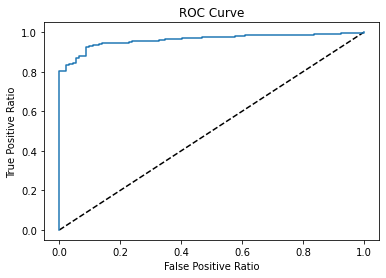

In [125]:
fpr, tpr, thresholds  = roc_curve(y2_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [126]:
print('AUC value : ', roc_auc_score(y2_test, test_prediction_proba))

AUC value :  0.9615182328190743


### 3. Precision / Recall Curve

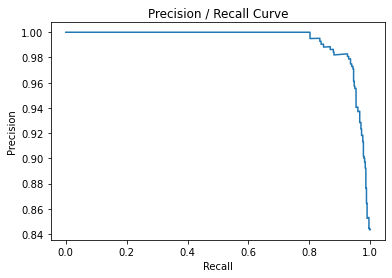

In [127]:
precision, recall, _ = precision_recall_curve(y2_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

### 4. Logarithmic Loss


In [128]:

print("Logarithmic Loss (log-loss) : " , log_loss(y2_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(y2_test, y_preds_test5))

Logarithmic Loss (log-loss) :  0.18795177797470267
Error Rate                  :  0.08673469387755106


## KNN

### 1. Classification

**Train Model**

In [129]:
y_knn = life_df5["Developing"]
X_knn = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)


In [130]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn,y_knn,test_size=0.2,random_state=42)

In [131]:
neighbors = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
neighbors.fit(X_knn_train ,y_knn_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction**

In [132]:
y_pred_knn_train = neighbors.predict(X_knn_train)
y_pred_knn_test = neighbors.predict(X_knn_test)


In [133]:
accuracy_knn=accuracy_score(y_pred_knn_train, y_knn_train )
print("KNN Accuracy        : {:.6f}".format(accuracy_knn))

KNN Accuracy        : 0.910213


**Performance Measuring**

In [134]:
print(classification_report(y_knn_test,  y_pred_knn_test))

print("f1_score() value        : {:.2f}".format(f1_score(y_knn_test, y_pred_knn_test)))
print("recall_score() value    : {:.2f}".format(recall_score(y_knn_test, y_pred_knn_test)))
print("precision_score() value : {:.2f}".format(precision_score(y_knn_test, y_pred_knn_test)))
print('\n')

metrics = precision_recall_fscore_support(y_knn_test, y_pred_knn_test)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        97
           1       0.91      0.93      0.92       491

    accuracy                           0.86       588
   macro avg       0.75      0.72      0.74       588
weighted avg       0.86      0.86      0.86       588

f1_score() value        : 0.92
recall_score() value    : 0.93
precision_score() value : 0.91


Precision  : [0.60240964 0.90693069]
Recall     : [0.51546392 0.93279022]
F1 Score   : [0.55555556 0.91967871]


### Performance Measuring

### 1. By score()

In [135]:
neighbors.score(X_knn_test, y_knn_test)

0.8639455782312925

Our model achieved 86% success in test data. 

### 2. Cross Validation

In [136]:
cvscores_3 = cross_val_score(neighbors, X_knn_test, y_knn_test, cv=3)
print('cv =  3 ---> Average cross validation score : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(neighbors, X_knn_test, y_knn_test, cv=10)
print('cv = 10 ---> Average cross validation score  : ', np.mean(cvscores_10))

cv =  3 ---> Average cross validation score :  0.814625850340136
cv = 10 ---> Average cross validation score  :  0.8214786674459381


### 2. Regression

In [290]:
y_knn2 = life_df5['Life expectancy']
X_knn2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [291]:
X_knn2_train, X_knn2_test, y_knn2_train, y_knn2_test =  train_test_split(X_knn2, y_knn2, test_size=0.20, random_state=111)

In [292]:
neighbors2 = KNeighborsRegressor(n_neighbors=3, metric='minkowski')
neighbors2.fit(X_knn2_train, y_knn2_train) 

KNeighborsRegressor(n_neighbors=3)

**Prediction**

In [293]:
y_pred_knn2_train = neighbors2.predict(X_knn2_train)
y_pred_knn2_test = neighbors2.predict(X_knn2_test)

In [294]:
print("R-squared of the model in training set is: {}".format(neighbors2 .score(X_knn2_train, y_knn2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(neighbors2 .score(X_knn2_test, y_knn2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_knn2_test, y_pred_knn2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_knn2_test, y_pred_knn2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_knn2_test, y_pred_knn2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_knn2_test - y_pred_knn2_test) / y_knn2_test)) * 100))

R-squared of the model in training set is: 0.5794155922919351
-----Test set statistics-----
R-squared of the model in test set is: 0.02829980427435108
Mean absolute error (MAE) of the prediction is: 6.637032583980769
Mean squared error (MSE) of the prediction is: 84.59154822183686
Root mean squared error (RMSE) of the prediction is: 9.197366374231096
Mean absolute percentage error (MAPE) of the prediction is: 10.420440418120172


## Decision Tree

### 1. Classification

**Train Model**

In [295]:
y_dt = life_df5['Developing']
X_dt = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)

In [296]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test =  train_test_split(X_dt, y_dt, test_size=0.20, random_state=111)

In [297]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state = 100)
decision_tree.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

**Prediction**

In [298]:
y_pred_dt_train = decision_tree.predict(X_dt_train)
y_pred_dt_test = decision_tree.predict(X_dt_test)


In [299]:
accuracy_dt=accuracy_score(y_pred_dt_train, y_dt_train )
print("Decision Tree Accuracy        : {:.6f}".format(accuracy_dt))

Decision Tree Accuracy        : 0.936170


In [ ]:
print("R-squared of the model in training set is: {}".format(decision_tree.score(X_dt_train, y_dt_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_tree.score(X_dt_test, y_dt_test)))


**Performance Measuring**

In [ ]:
print(classification_report(y_dt_test,  y_predict_dt))

print("f1_score() value        : {:.2f}".format(f1_score(y_dt_test, y_predict_dt)))
print("recall_score() value    : {:.2f}".format(recall_score(y_dt_test, y_predict_dt)))
print("precision_score() value : {:.2f}".format(precision_score(y_dt_test, y_predict_dt)))
print('\n')

metrics = precision_recall_fscore_support(y_dt_test, y_predict_dt)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

In [ ]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=decision_tree.feature_importances_,
                        index= X_dt_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

It seems that income composition of resources is the most important variable while default is the least important variable.

### 2. Regression

**Train Model**

In [300]:
y_dt2 = life_df5['Life expectancy']
X_dt2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [301]:
X_dt2_train, X_dt2_test, y_dt2_train, y_dt2_test =  train_test_split(X_dt2, y_dt2, test_size=0.20, random_state=111)

In [302]:
decision_tree2 = DecisionTreeRegressor(max_depth=3,random_state = 100)
decision_tree2.fit(X_dt2_train, y_dt2_train) 

DecisionTreeRegressor(max_depth=3, random_state=100)

**Prediction**

In [303]:
y_pred_dt2_train = decision_tree2.predict(X_dt2_train)
y_pred_dt2_test = decision_tree2.predict(X_dt2_test)


In [304]:
print("R-squared of the model in training set is: {}".format(decision_tree2.score(X_dt2_train, y_dt2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_tree2.score(X_dt2_test, y_dt2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_dt2_test, y_pred_dt2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_dt2_test, y_pred_dt2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_dt2_test, y_pred_dt2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_dt2_test - y_pred_dt2_test) / y_dt2_test)) * 100))

R-squared of the model in training set is: 0.976622088227984
-----Test set statistics-----
R-squared of the model in test set is: 0.9752523076601944
Mean absolute error (MAE) of the prediction is: 1.2301596213359745
Mean squared error (MSE) of the prediction is: 2.1544151366342934
Root mean squared error (RMSE) of the prediction is: 1.4677926068196057
Mean absolute percentage error (MAPE) of the prediction is: 1.8185819960193184


## Random Forest

### 1. Classification

**Train Model**

In [305]:
y_rf = life_df5['Developing']
X_rf = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)

In [306]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test =  train_test_split(X_rf, y_rf, test_size=0.20, random_state=111)

In [307]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=111)
random_forest.fit(X_rf_train, y_rf_train) 

RandomForestClassifier(n_estimators=25, random_state=111)

**Prediction**

In [308]:
y_pred_rf_train = random_forest.predict(X_rf_train)
y_pred_rf_test = random_forest.predict(X_rf_test)

In [309]:
print("R-squared of the model in training set is: {}".format(random_forest.score(X_rf_train, y_rf_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(random_forest.score(X_rf_test, y_rf_test)))


R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9812925170068028


**Performance Measuring**

In [310]:
y_predict_rf = random_forest.predict(X_rf_test)
print("Random Forest Accuracy        : {:.4f}".format(accuracy_score(y_rf_test, y_predict_rf)))

Random Forest Accuracy        : 0.9813


In [267]:
print(classification_report(y_rf_test,  y_predict_rf))

print("f1_score() value        : {:.2f}".format(f1_score(y_rf_test, y_predict_rf)))
print("recall_score() value    : {:.2f}".format(recall_score(y_rf_test, y_predict_rf)))
print("precision_score() value : {:.2f}".format(precision_score(y_rf_test, y_predict_rf)))
print('\n')

metrics = precision_recall_fscore_support(y_rf_test, y_predict_rf)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.99      0.99      0.99       492

    accuracy                           0.98       588
   macro avg       0.97      0.96      0.97       588
weighted avg       0.98      0.98      0.98       588

f1_score() value        : 0.99
recall_score() value    : 0.99
precision_score() value : 0.99


Precision  : [0.94736842 0.98782961]
Recall     : [0.9375    0.9898374]
F1 Score   : [0.94240838 0.98883249]


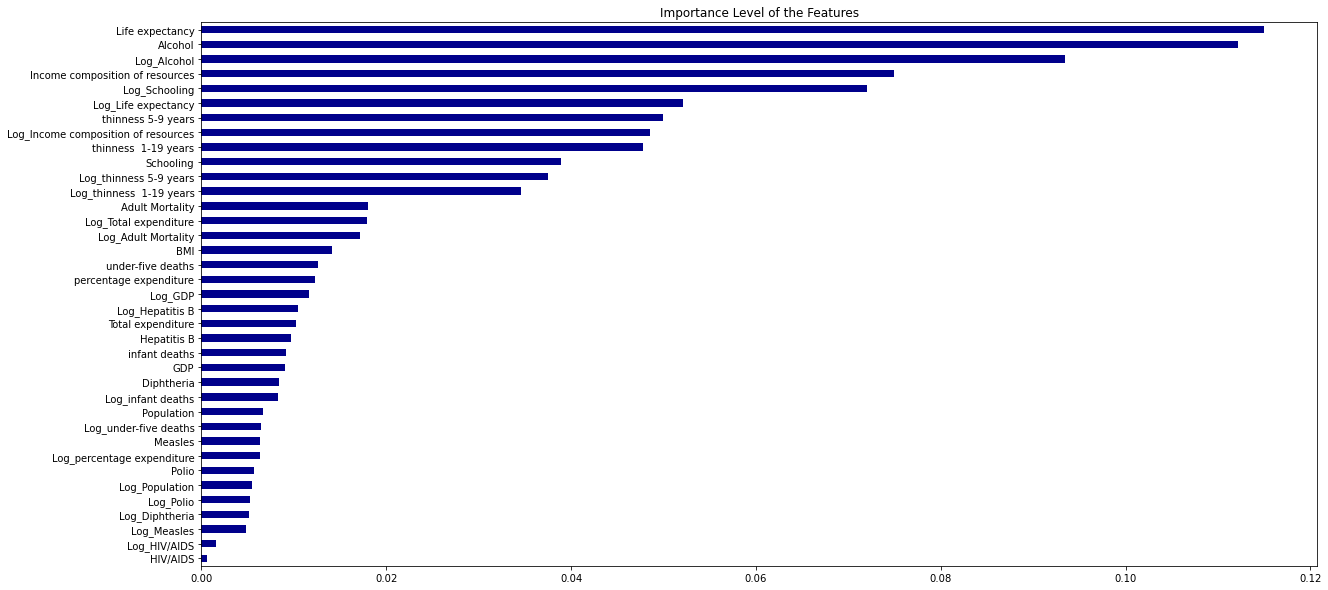

In [268]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_rf_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

It seems that life expectancy is the most important variable while default is the least important variable.

### 2. Regression

**Train Model**

In [269]:
y_rf2 = life_df5['Life expectancy']
X_rf2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [270]:
X_rf2_train, X_rf2_test, y_rf2_train, y_rf2_test =  train_test_split(X_rf2, y_rf2, test_size=0.20, random_state=111)

In [271]:
random_forest2 = RandomForestRegressor(n_estimators=25, random_state=111)
random_forest2.fit(X_rf2_train, y_rf2_train) 

RandomForestRegressor(n_estimators=25, random_state=111)

**Prediction**

In [272]:
y_pred_rf2_train = random_forest2.predict(X_rf2_train)
y_pred_rf2_test = random_forest2.predict(X_rf2_test)

In [273]:
print("R-squared of the model in training set is: {}".format(random_forest2.score(X_rf2_train, y_rf2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(random_forest2.score(X_rf2_test, y_rf2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_rf2_test, y_pred_rf2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_rf2_test, y_pred_rf2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_rf2_test, y_pred_rf2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_rf2_test - y_pred_rf2_test) / y_rf2_test)) * 100))

R-squared of the model in training set is: 0.9999490173984874
-----Test set statistics-----
R-squared of the model in test set is: 0.9999773023392357
Mean absolute error (MAE) of the prediction is: 0.014385947548426018
Mean squared error (MSE) of the prediction is: 0.001975949241874675
Root mean squared error (RMSE) of the prediction is: 0.044451650609113214
Mean absolute percentage error (MAPE) of the prediction is: 0.025825023678876815


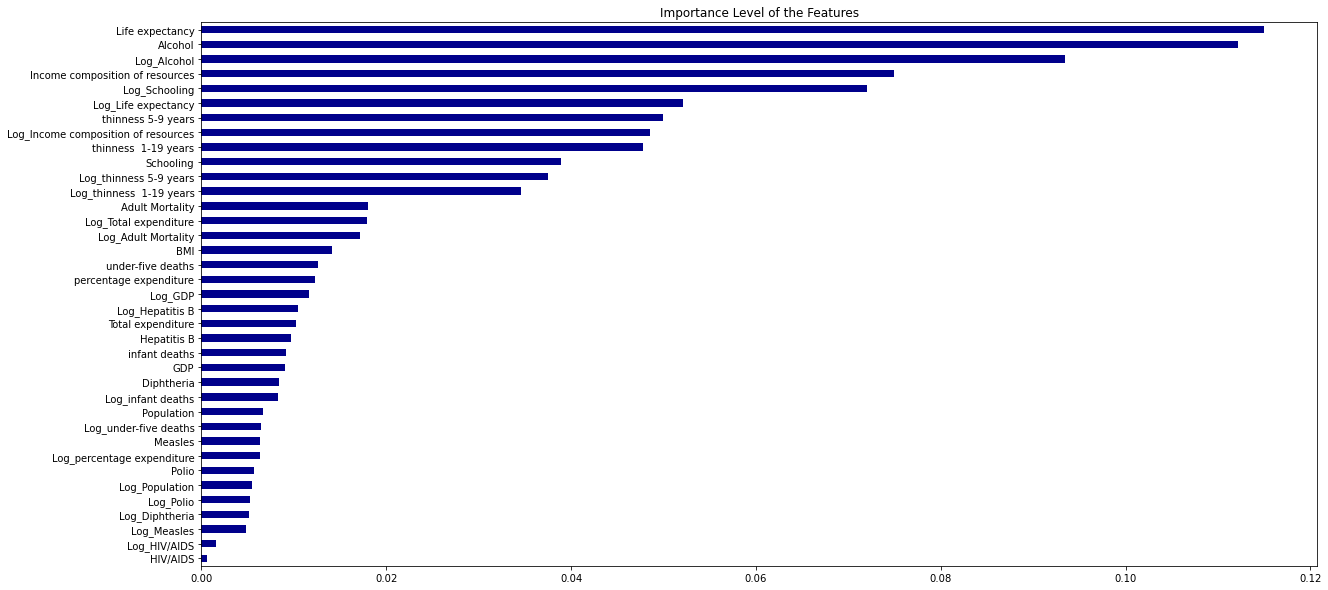

In [274]:
plt.figure(figsize=(20,10))
importance_level2 = pd.Series(data=random_forest2.feature_importances_,
                        index= X_rf2_train.columns)

importance_level_sorted2 = importance_level.sort_values()

importance_level_sorted2.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

## SVM

### 1. Classification

**Train Model**

In [131]:
y_svm = life_df5['Developing']
X_svm = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)

In [132]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test =  train_test_split(X_svm, y_svm, test_size=0.20, random_state=111)

In [133]:
svc = SVC()
svc.fit(X_svm_train, y_svm_train) 

SVC()

**Prediction**

In [134]:
y_pred_svm_train = svc.predict(X_svm_train)
y_pred_svm_test = svc.predict(X_svm_test)

In [135]:
print("R-squared of the model in training set is: {}".format(svc.score(X_svm_train, y_svm_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svc.score(X_svm_test, y_svm_test)))


R-squared of the model in training set is: 0.8229787234042554
-----Test set statistics-----
R-squared of the model in test set is: 0.8367346938775511


**Performance Measuring**

In [331]:
y_predict_svm = svc.predict(X_svm_test)
print("SVC Accuracy        : {:.4f}".format(accuracy_score(y_svm_test, y_pred_svm_test)))

SVC Accuracy        : 0.8367


In [143]:
print(classification_report(y_svm_test,  y_pred_svm_test))

print("f1_score() value        : {:.2f}".format(f1_score(y_svm_test, y_pred_svm_test)))
print("recall_score() value    : {:.2f}".format(recall_score(y_svm_test, y_pred_svm_test)))
print("precision_score() value : {:.2f}".format(precision_score(y_svm_test, y_pred_svm_test)))
print('\n')

metrics = precision_recall_fscore_support(y_svm_test, y_pred_svm_test)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.84      1.00      0.91       492

    accuracy                           0.84       588
   macro avg       0.42      0.50      0.46       588
weighted avg       0.70      0.84      0.76       588

f1_score() value        : 0.91
recall_score() value    : 1.00
precision_score() value : 0.84


Precision  : [0.         0.83673469]
Recall     : [0. 1.]
F1 Score   : [0.         0.91111111]


### 2. Regression

**Train Model**

In [147]:
y_svm2 = life_df5['Life expectancy']
X_svm2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [148]:
X_svm2_train, X_svm2_test, y_svm2_train, y_svm2_test =  train_test_split(X_svm2, y_svm2, test_size=0.20, random_state=111)

In [149]:
svr = SVR()
svr.fit(X_svm2_train, y_svm2_train) 

SVR()

**Prediction**

In [150]:
y_pred_svm2_train = svr.predict(X_svm2_train)
y_pred_svm2_test = svr.predict(X_svm2_test)

In [151]:
print("R-squared of the model in training set is: {}".format(svr.score(X_svm2_train, y_svm2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr.score(X_svm2_test, y_svm2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_svm2_test, y_pred_svm2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_svm2_test, y_pred_svm2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_svm2_test, y_pred_svm2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_svm2_test - y_pred_svm2_test) / y_svm2_test)) * 100))

R-squared of the model in training set is: -0.08677886495482601
-----Test set statistics-----
R-squared of the model in test set is: -0.10386541510295011
Mean absolute error (MAE) of the prediction is: 7.406568229557493
Mean squared error (MSE) of the prediction is: 96.09721692231041
Root mean squared error (RMSE) of the prediction is: 9.802918796068363
Mean absolute percentage error (MAPE) of the prediction is: 12.065967465233117


## XGBoost

### 1. Classification

**Train and Test Data**

In [312]:
y_xgb = life_df5['Developing']
X_xgb = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)

In [313]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test =  train_test_split(X_xgb, y_xgb, test_size=0.20, random_state=111)

**Dmatrix**

In [314]:
dtrain_xgb = xgb.DMatrix(X_xgb_train, label=y_xgb_train)
dtest_xgb = xgb.DMatrix(X_xgb_test, label=y_xgb_test)

**Parameters**

In [315]:
params = {"objective":"reg:logistic", "max_depth":3}

**Train Model**

In [316]:
bst = xgb.XGBClassifier(**params)
bst.fit(X_xgb_train, y_xgb_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Prediction**

In [317]:
y_pred_xgb_train = bst.predict(X_xgb_train)
y_pred_xgb_test = bst.predict(X_xgb_test)

In [318]:
print("R-squared of the model in training set is: {}".format(bst.score(X_xgb_train, y_xgb_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(bst.score(X_xgb_test, y_xgb_test)))


R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9795918367346939


**Performance Measuring**

In [333]:
y_predict_xgb = bst.predict(X_xgb_test)
print("XGB Accuracy        : {:.6f}".format(accuracy_score(y_xgb_test, y_pred_xgb_test)))

XGB Accuracy        : 0.979592


In [321]:
print(classification_report(y_xgb_test,  y_pred_xgb_test))

print("f1_score() value        : {:.2f}".format(f1_score(y_xgb_test, y_pred_xgb_test)))
print("recall_score() value    : {:.2f}".format(recall_score(y_xgb_test, y_pred_xgb_test)))
print("precision_score() value : {:.2f}".format(precision_score(y_xgb_test, y_pred_xgb_test)))
print('\n')

metrics = precision_recall_fscore_support(y_xgb_test, y_pred_xgb_test)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        96
           1       0.99      0.99      0.99       492

    accuracy                           0.98       588
   macro avg       0.97      0.96      0.96       588
weighted avg       0.98      0.98      0.98       588

f1_score() value        : 0.99
recall_score() value    : 0.99
precision_score() value : 0.99


Precision  : [0.94680851 0.98582996]
Recall     : [0.92708333 0.9898374 ]
F1 Score   : [0.93684211 0.98782961]


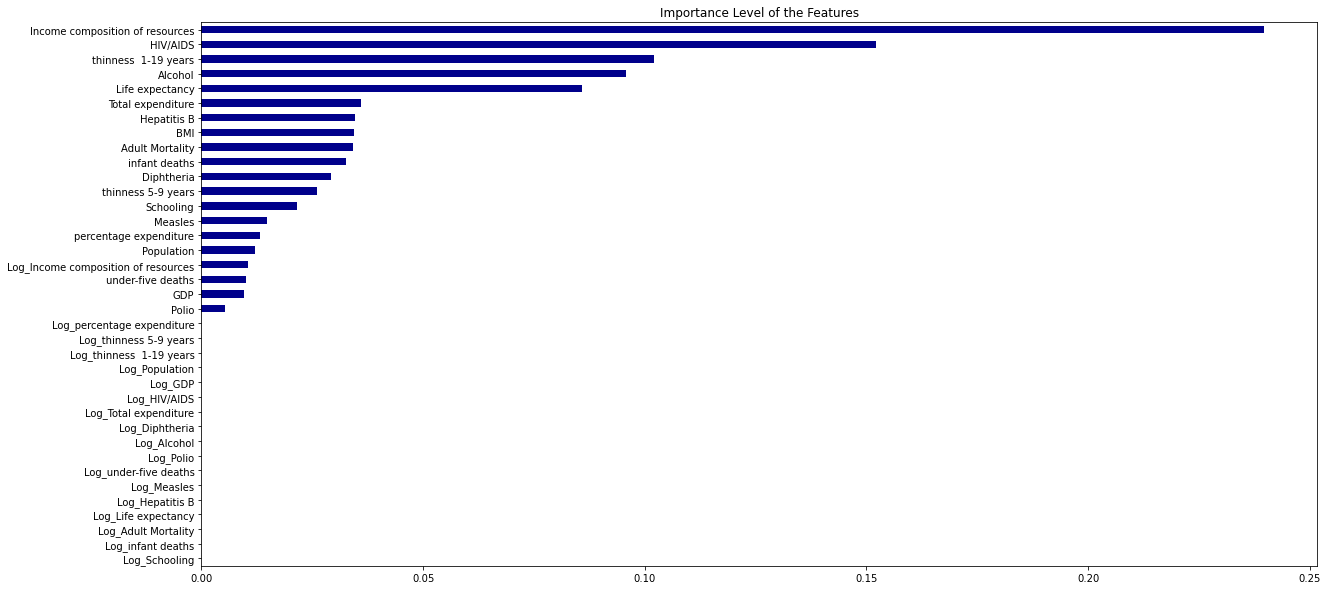

In [283]:
plt.figure(figsize=(20,10))
importance_level_xgb = pd.Series(data=bst.feature_importances_,
                        index= X_xgb_train.columns)

importance_level_sorted_xgb = importance_level_xgb.sort_values()

importance_level_sorted_xgb.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

### 2. Regression

**Train and Test Data**

In [151]:
y_xgb2 = life_df5['Life expectancy']
X_xgb2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [152]:
X_xgb2_train, X_xgb2_test, y_xgb2_train, y_xgb2_test =  train_test_split(X_xgb2, y_xgb2, test_size=0.20, random_state=111)

**Dmatrix**

In [153]:
dtrain_xgb2 = xgb.DMatrix(X_xgb2_train, label=y_xgb2_train)
dtest_xgb2 = xgb.DMatrix(X_xgb2_test, label=y_xgb2_test)

**Tarin Model**

In [157]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_xgb2_train, y_xgb2_train)

[15:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

**Prediction**

In [158]:
y_pred_xgb2_train = xg_reg.predict(X_xgb2_train)
y_pred_xgb2_test = xg_reg.predict(X_xgb2_test)

In [159]:
print("R-squared of the model in training set is: {}".format(xg_reg.score(X_xgb2_train, y_xgb2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(xg_reg.score(X_xgb2_test, y_xgb2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_xgb2_test, y_pred_xgb2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_xgb2_test, y_pred_xgb2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_xgb2_test, y_pred_xgb2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_xgb2_test - y_pred_xgb2_test) / y_xgb2_test)) * 100))

R-squared of the model in training set is: -5.527246966656666
-----Test set statistics-----
R-squared of the model in test set is: -5.7840974449327485
Mean absolute error (MAE) of the prediction is: 23.96699370811085
Mean squared error (MSE) of the prediction is: 590.5909134103932
Root mean squared error (RMSE) of the prediction is: 24.302076318915493
Mean absolute percentage error (MAPE) of the prediction is: 34.51965670698273


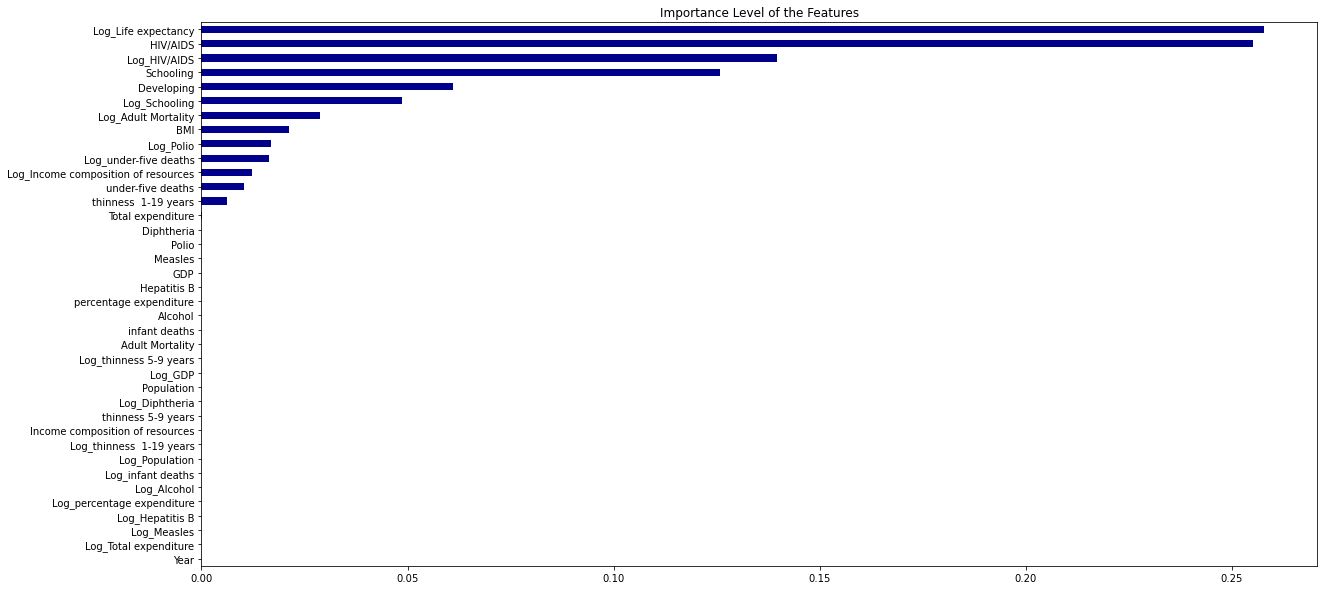

In [163]:
plt.figure(figsize=(20,10))
importance_level_xgb2 = pd.Series(data=xg_reg.feature_importances_,
                        index= X_xgb2_train.columns)

importance_level_sorted_xgb2 = importance_level_xgb2.sort_values()

importance_level_sorted_xgb2.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

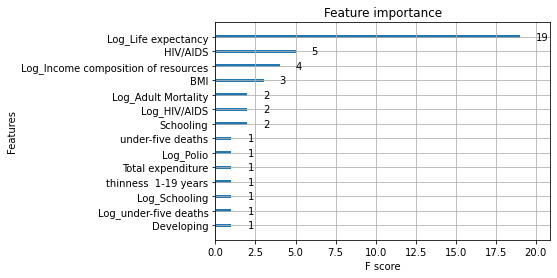

In [179]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Boosting with Light GBM

### 1. Classification

**Train and Test Data**

In [324]:
y_lgb = life_df5['Developing']
X_lgb = life_df5.drop(['Developing', 'Year', 'Status', 'Country'], axis=1)

In [325]:
X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test =  train_test_split(X_lgb, y_lgb, test_size=0.20, random_state=111)

**Dataset**

In [326]:
d_train_lgb = lgb.Dataset(X_lgb_train, label=y_lgb_train)


Convert the training data to LightGBM data format before training the model

**Parametres**

In [327]:
params_lgb = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

**Train Model**

In [328]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_lgb_train, y_lgb_train)


LGBMClassifier()

**Prediction**

In [329]:
y_pred_lgb_test = lgb_model.predict(X_lgb_test)

In [330]:
print("R-squared of the model in training set is: {}".format(lgb_model.score(X_lgb_train, y_lgb_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lgb_model.score(X_lgb_test, y_lgb_test)))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9812925170068028


**Performance Measuring**

In [185]:
accuracy_lgb=accuracy_score(y_pred_lgb_test, y_lgb_test )
print("Light GBM Accuracy        : {:.6f}".format(accuracy_lgb))

Light GBM Accuracy        : 0.981293


In [186]:
y_pred_lgb_train = lgb_model.predict(X_lgb_train)

In [187]:
accuracy_lgb2=accuracy_score(y_pred_lgb_train, y_lgb_train )
print("Light GBM Accuracy        : {:.6f}".format(accuracy_lgb2))

Light GBM Accuracy        : 1.000000


In [188]:
print(classification_report(y_lgb_test,  y_pred_lgb_test))

print("f1_score() value        : {:.2f}".format(f1_score(y_lgb_test, y_pred_lgb_test)))
print("recall_score() value    : {:.2f}".format(recall_score(y_lgb_test, y_pred_lgb_test)))
print("precision_score() value : {:.2f}".format(precision_score(y_lgb_test, y_pred_lgb_test)))
print('\n')

metrics = precision_recall_fscore_support(y_lgb_test, y_pred_lgb_test)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        96
           1       0.99      0.99      0.99       492

    accuracy                           0.98       588
   macro avg       0.97      0.96      0.97       588
weighted avg       0.98      0.98      0.98       588

f1_score() value        : 0.99
recall_score() value    : 0.99
precision_score() value : 0.99


Precision  : [0.95698925 0.98585859]
Recall     : [0.92708333 0.99186992]
F1 Score   : [0.94179894 0.98885512]


### 2. Regression

**Train and Test Data**

In [189]:
y_lgb2 = life_df5['Life expectancy']
X_lgb2 = life_df5.drop(['Life expectancy', 'Status', 'Country'], axis=1)

In [190]:
X_lgb2_train, X_lgb2_test, y_lgb2_train, y_lgb2_test =  train_test_split(X_lgb2, y_lgb2, test_size=0.20, random_state=111)

**Dataset**

In [191]:
d_train_lgb2 = lgb.Dataset(X_lgb2_train, label=y_lgb2_train)


Convert the training data to LightGBM data format before training the model

**Parametres**

In [192]:
params_lgb2 = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

**Train Model**

In [193]:
lgb_model2 = lgb.LGBMRegressor()
lgb_model2.fit(X_lgb2_train, y_lgb2_train)

LGBMRegressor()

**Prediction**

In [200]:
y_pred_lgb2_train = lgb_model2.predict(X_lgb2_train)
y_pred_lgb2_test = lgb_model2.predict(X_lgb2_test)

In [201]:
print("R-squared of the model in training set is: {}".format(lgb_model2.score(X_lgb2_train, y_lgb2_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lgb_model2.score(X_lgb2_test, y_lgb2_test)))
print("Mean absolute error (MAE) of the prediction is: {}".format(mean_absolute_error(y_lgb2_test, y_pred_lgb2_test)))
print("Mean squared error (MSE) of the prediction is: {}".format(mse(y_lgb2_test, y_pred_lgb2_test)))
print("Root mean squared error (RMSE) of the prediction is: {}".format(rmse(y_lgb2_test, y_pred_lgb2_test)))
print("Mean absolute percentage error (MAPE) of the prediction is: {}".format(np.mean(np.abs((y_lgb2_test - y_pred_lgb2_test) / y_lgb2_test)) * 100))

R-squared of the model in training set is: 0.9997540476804074
-----Test set statistics-----
R-squared of the model in test set is: 0.9996858978585398
Mean absolute error (MAE) of the prediction is: 0.05660220167024089
Mean squared error (MSE) of the prediction is: 0.027344222593337048
Root mean squared error (RMSE) of the prediction is: 0.1653608859232952
Mean absolute percentage error (MAPE) of the prediction is: 0.09610366600555438


In [205]:
from sklearn.metrics import mean_squared_error

lgb_reg_model = lgb.train(params_lgb2, d_train_lgb2, num_boost_round = 100)
y_pre = lgb_reg_model.predict(X_lgb2_test)
y_pre_train = lgb_reg_model.predict(X_lgb2_train)

rmse = np.sqrt(mean_squared_error(y_lgb2_test, y_pred_lgb2_test))
print("RMSE: %f" % (rmse))

RMSE: 0.165361


## All Results